<a href="https://colab.research.google.com/github/Uppala19/Airline-fare-Prediction/blob/main/Trail_Code_before_submision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

epoch plot need to plot



In [133]:
import pandas as pd #Data manipulation and analysis
import numpy as np  #	Numerical computations
from datetime import datetime, timedelta #Used for working with date and time data (timestamps, time differences, etc.).
import holidays  # For marking holiday flights,Detects whether a given date is a public holiday
import matplotlib.pyplot as plt #Data Visualization,Helps create plots and charts for data visualization.
import seaborn as sns     # Statistical Data Visualization
import requests           #fetching external data from APIs or web services
import time              #Measures execution time and adds delays,Performance Measurement & Delays


Load and Explore the Dataset

In [134]:
# Load dataset
file_path = '/content/Data_Train (3).xlsx' # Replace with your dataset path
data = pd.read_excel(file_path)

Size of data set

In [135]:
#Displays the number of rows and columns in the dataset.
data.shape

(10683, 11)

Inspect the dataset

In [136]:
#Displays the first three rows of the dataset
data.head(3)

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882

In [137]:
data.iloc[-2:]  # Retrieves the last 2 rows


Airline Date_of_Journey    Source Destination                  Route  \
10681    Vistara      01/03/2019  Banglore   New Delhi              BLR → DEL   
10682  Air India       9/05/2019     Delhi      Cochin  DEL → GOI → BOM → COK   

      Dep_Time Arrival_Time Duration Total_Stops Additional_Info  Price  
10681    11:30        14:10   2h 40m    non-stop         No info  12648  
10682    10:55        19:15   8h 20m     2 stops         No info  11753

#information about the data

In [138]:
# Displays summary information about the dataset, including column names, data types, and non-null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [139]:
#Prints all column names
print(data.columns)


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [140]:
#Provides statistical descriptions
data.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

Check for missing values

In [141]:
#Counts the number of missing values in each column.
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Adding some neccesary data fields to already existing excel data set

In [142]:
# Installing necessary libraries for data analysis, Excel file handling, geolocation, web requests, date/time processing, and holiday detection
!pip install pandas openpyxl geopy requests python-dateutil holidays

In [143]:
# Reading the Excel file into a pandas DataFrame using the openpyxl engine for proper `.xlsx` file handling
data = pd.read_excel(file_path, engine='openpyxl')



Add Cabin Class

In [144]:
cabin_classes = ['Economy', 'Business', 'First Class']  # Define available cabin classes
data['Cabin_Class'] = np.random.choice(cabin_classes, size=len(data))  # Assign random cabin classes to each row


Extract Layover Information from Route

In [145]:
# Function to calculate the number of stops (layovers) in a flight route
def get_layover(route):
    stops = route.count('→')  # Count the number of '→' symbols indicating stops
    return stops, "Direct" if stops == 0 else f"{stops} Stop(s)"  # Return stop count and label

# Apply the function to the 'Route' column and create two new columns: 'Number_of_Stops' and 'Flight_Layover'
data[['Number_of_Stops', 'Flight_Layover']] = data['Route'].apply(lambda x: pd.Series(get_layover(str(x))))


Calculate Days Until Departure

In [146]:
# Convert the 'Date_of_Journey' column to a pandas datetime object for further manipulation
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')

# Generate random 'Booking_Date' between 1 and 60 days before 'Date_of_Journey'
data['Booking_Date'] = data['Date_of_Journey'] - pd.to_timedelta(np.random.randint(1, 60, size=len(data)), unit='D')

# Calculate 'Days_Until_Departure' by finding the difference in days between 'Date_of_Journey' and 'Booking_Date'
data['Days_Until_Departure'] = (data['Date_of_Journey'] - data['Booking_Date']).dt.days


 fetching holidays in 2019

In [147]:
import requests  # Importing the 'requests' library to send HTTP requests to external APIs
import pandas as pd  # Importing pandas for data manipulation (not actively used in this part)

# Replace with your actual API key from Calendarific
API_KEY = "NGcTjMSkwkZd1LT0ltkzOf9UdY0EzJ2k"  # API key for authentication with Calendarific API

# Define the API endpoint for fetching holidays in 2019
url = f"https://calendarific.com/api/v2/holidays?api_key={API_KEY}&country=IN&year=2019"  # Constructing the API URL with parameters

# Make the API request
response = requests.get(url)  # Sending GET request to the API to fetch holiday data

# Check if the request was successful (Status Code 200 indicates success)
if response.status_code == 200:
    holidays_data = response.json()  # Parse the JSON response from the API

    # Extract holiday details from the response
    holidays_list = holidays_data.get("response", {}).get("holidays", [])  # Extract the holidays data

    # Display the holiday details
    print(f"Airline Holidays for 2019 in India:\n")  # Print header message for holidays list

    holiday_dates = []  # Initialize an empty list to store holiday dates
    for holiday in holidays_list:  # Loop through each holiday in the holidays list
        holiday_date = holiday["date"]["iso"][:10]  # Extract date in 'YYYY-MM-DD' format
        holiday_name = holiday["name"]  # Extract the name of the holiday
        holiday_type = holiday["type"]  # Extract the type of the holiday
        holiday_dates.append(holiday_date)  # Add the holiday date to the list
        # print(f"Date: {holiday_date} | Name: {holiday_name} | Type: {holiday_type}")

else:
    print(f"Error: Unable to fetch holiday data (Status Code: {response.status_code})")  # Print error message if request fails


Airline Holidays for 2019 in India:



 Mark Holiday Season Flights

In [148]:
    # Convert holiday dates to datetime format for comparison
    holiday_dates = pd.to_datetime(holiday_dates, format='%Y-%m-%d') # Specify the format

    # Mark flights as part of the holiday season (1 if holiday, 0 if not)
    data['Is_Holiday_Season'] = data['Date_of_Journey'].isin(holiday_dates).astype(int)
    #print(data)

Off-Peak Season Flag

In [149]:
# Function to determine if the flight is in the peak season
def is_peak_season(row):
    # Define peak_months here
    peak_months = [12, 1, 2, 3, 4]  # Example: December to April are peak months

    # Check if the flight date is during a holiday or in peak months
    if row['Date_of_Journey'] in holiday_dates or row['Date_of_Journey'].month in peak_months:
        return 1  # Peak season
    return 0  # Non-peak season

# Apply the function to create the 'Is_Peak_Season' column
data['Is_Peak_Season'] = data.apply(is_peak_season, axis=1)
# Now, let's analyze fare prices during peak season vs non-peak season
peak_fares = data[data['Is_Peak_Season'] == 1]['Price']
non_peak_fares = data[data['Is_Peak_Season'] == 0]['Price']
# Calculate average fare for peak and non-peak season
average_peak_fare = peak_fares.mean()
average_non_peak_fare = non_peak_fares.mean()

print(f"Average fare during peak season: {average_peak_fare}")
print(f"Average fare during non-peak season: {average_non_peak_fare}")
print(data.head(2))

Average fare during peak season: 9173.056744749596
Average fare during non-peak season: 9012.76025126505
     Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   

  Cabin_Class  Number_of_Stops Flight_Layover Booking_Date  \
0     Economy                1      1 Stop(s)   2019-02-18   
1     Economy                3      3 Stop(s)   2019-04-02   

   Days_Until_Departure  Is_Holiday_Season  Is_Peak_Season  
0                    34                  0               1  
1                    29                  1               1  


Adding Simulated Data to oil Prices

In [150]:
import random
from google.colab import files
# Set seeds for reproducibility
random.seed(0)
np.random.seed(0)

# Generate the data
fuel_price_data = pd.DataFrame({
    'Date': pd.date_range(start='2019-01-01', periods=365, freq='D'),
    'Fuel_Price_INR': np.random.uniform(60000, 90000, size=365)
})

# Save to Excel
fuel_price_data.to_excel("fuel_price_data.xlsx", index=False)


In [151]:
# Load the data from Excel
fuel_price_data = pd.read_excel("fuel_price_data.xlsx")

print(fuel_price_data.head(5))

        Date  Fuel_Price_INR
0 2019-01-01    76464.405118
1 2019-01-02    81455.680991
2 2019-01-03    78082.901282
3 2019-01-04    76346.495490
4 2019-01-05    72709.643980


In [152]:

# Merge fuel prices with dataset
# Enforce datetime consistency
data['Booking_Date'] = pd.to_datetime(data['Booking_Date']).dt.normalize()
fuel_price_data['Date'] = pd.to_datetime(fuel_price_data['Date']).dt.normalize()
# Remove duplicates in fuel price data
fuel_price_data = fuel_price_data.groupby('Date', as_index=False).mean()

# Step 4: Merge the two datasets based on the date columns
data = data.merge(fuel_price_data, left_on='Booking_Date', right_on='Date', how='left' ,suffixes=('', '_fuel'))
# Step 5: Rename the 'Fuel_Price_INR' column to 'ATF_Price_INR' (or another name if needed)
data.rename(columns={'Fuel_Price_INR': 'ATF_Price_INR'}, inplace=True)
# Step 6: Drop the 'Date' column from fuel_price_data if no longer needed
data.drop(columns=['Date'], inplace=True)

In [153]:
print(data.head(3))

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   

   Cabin_Class  Number_of_Stops Flight_Layover Booking_Date  \
0      Economy                1      1 Stop(s)   2019-02-18   
1      Economy                3      3 Stop(s)   2019-04-02   
2  First Class                3      3 Stop(s)   2019-04-24   

   Days_Until_Departure  Is_Holiday_Season  Is_Peak_Season  ATF_Price_INR  
0                    34                  0               1   6946

In [154]:
# Save the updated dataset to a new CSV file
data.to_csv('updated_dataset.csv', index=False)

In [155]:

data.to_excel("Updated_Flight_Fare_Data.xlsx", index=False, engine='openpyxl')

print("✅ Updated dataset saved successfully!")

✅ Updated dataset saved successfully!


save an updated file in Google Colab

In [156]:

# Assuming the updated data is in a DataFrame called 'data'
data.to_csv('/content/updated_file.csv', index=False)


In [157]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   

  Cabin_Class  Number_of_Stops Flight_Layover Booking_Date  \
0     Economy                1      1 Stop(s)   2019-02-18   
1     Economy                3      3 Stop(s)   2019-04-02   

   Days_Until_Departure  Is_Holiday_Season  Is_Peak_Season  ATF_Price_INR  
0                    34                  0               1   69462.850528  
1                    29                  1               1   80022.311399

In [158]:
#Fetch all Columns
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Cabin_Class', 'Number_of_Stops',
       'Flight_Layover', 'Booking_Date', 'Days_Until_Departure',
       'Is_Holiday_Season', 'Is_Peak_Season', 'ATF_Price_INR'],
      dtype='object')

In [159]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   

  Cabin_Class  Number_of_Stops Flight_Layover Booking_Date  \
0     Economy                1      1 Stop(s)   2019-02-18   
1     Economy                3      3 Stop(s)   2019-04-02   

   Days_Until_Departure  Is_Holiday_Season  Is_Peak_Season  ATF_Price_INR  
0                    34                  0               1   69462.850528  
1                    29                  1               1   80022.311399

Data Analysis And Visualization on train dataSet

In [160]:
#to extract names of airlines from the data
unique_airlines = pd.unique(data["Airline"])
print(unique_airlines)


['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


In [161]:
#Iterate through each column in the DataFrame and print the number of unique values in that column
for i in data:
    print(f"Number of unique values in {i} -->> {data[i].nunique()}")

Number of unique values in Airline -->> 12
Number of unique values in Date_of_Journey -->> 40
Number of unique values in Source -->> 5
Number of unique values in Destination -->> 6
Number of unique values in Route -->> 128
Number of unique values in Dep_Time -->> 222
Number of unique values in Arrival_Time -->> 1343
Number of unique values in Duration -->> 368
Number of unique values in Total_Stops -->> 5
Number of unique values in Additional_Info -->> 10
Number of unique values in Price -->> 1870
Number of unique values in Cabin_Class -->> 3
Number of unique values in Number_of_Stops -->> 6
Number of unique values in Flight_Layover -->> 6
Number of unique values in Booking_Date -->> 177
Number of unique values in Days_Until_Departure -->> 59
Number of unique values in Is_Holiday_Season -->> 2
Number of unique values in Is_Peak_Season -->> 2
Number of unique values in ATF_Price_INR -->> 177


In [162]:
#Print the count of each unique value in every column
for i in data:
    print(data[i].value_counts())

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
Date_of_Journey
2019-05-18    504
2019-06-06    503
2019-05-21    497
2019-06-09    495
2019-06-12    493
2019-05-09    484
2019-03-21    423
2019-05-15    405
2019-03-06    403
2019-05-27    382
2019-06-27    355
2019-06-24    351
2019-06-01    342
2019-06-03    333
2019-06-15    328
2019-03-24    323
2019-03-03    315
2019-03-09    302
2019-03-27    299
2019-05-24    286
2019-05-06    282
2019-05-01    277
2019-05-12    259
2019-04-01    257
2019-03-01    

 Visualisation of how do Layovers Affect Flight Prices by scatter plot

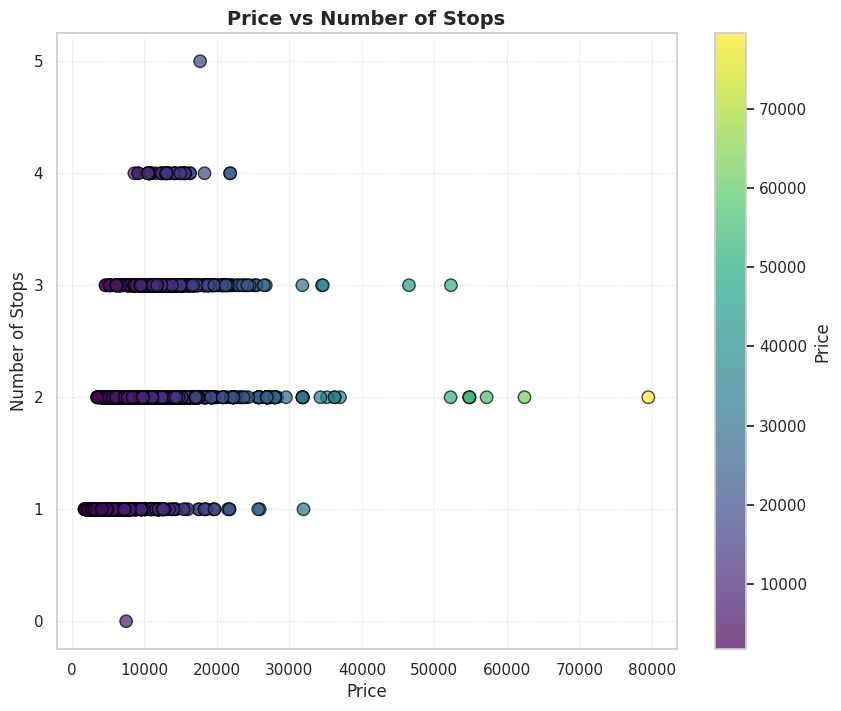

In [163]:
# Create a scatter plot with customized aesthetics
plt.figure(figsize=(10, 8))

# Use a color map to represent the data more beautifully
plt.scatter(data['Price'], data['Number_of_Stops'], s=80, alpha=0.7, c=data['Price'], cmap='viridis', edgecolors='black')

# Add a color bar to indicate the price scale
plt.colorbar(label='Price')

# Customize plot title and labels
plt.title('Price vs Number of Stops', fontsize=14, fontweight='bold')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Number of Stops', fontsize=12)

# Add grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# Show the plot
plt.show()


Distribution of Flights Across Airlines

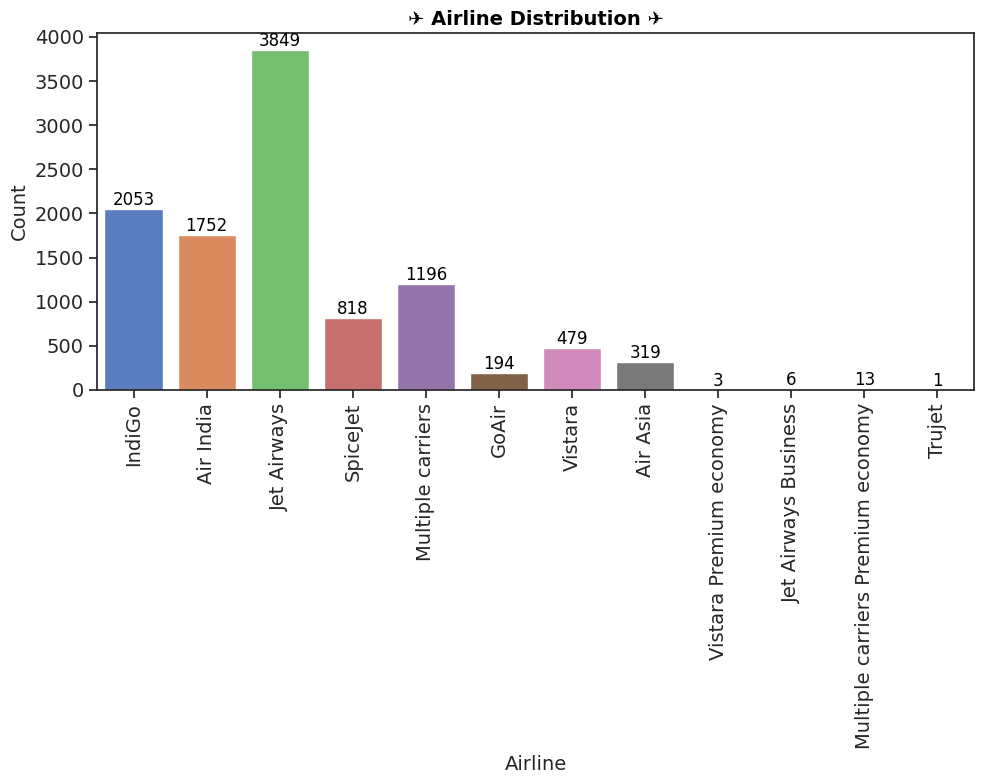

In [164]:
# Set a nice style
sns.set(style="ticks")

# Create the countplot with a color palette
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="Airline", data=data, hue="Airline", palette="muted", legend=False)

# Title and labels with styling
plt.title("✈️ Airline Distribution ✈️", fontweight="bold", fontsize=14, color="black")
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-tick labels for better readability
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)


# Add value labels on bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1,  # adjust +1 as needed
            f'{int(height)}', ha='center', va='bottom', fontsize=12, color='black',)

# Show the plot
plt.tight_layout()
plt.show()


Visualizing how ticket fares vary across different airlines over the journey dates



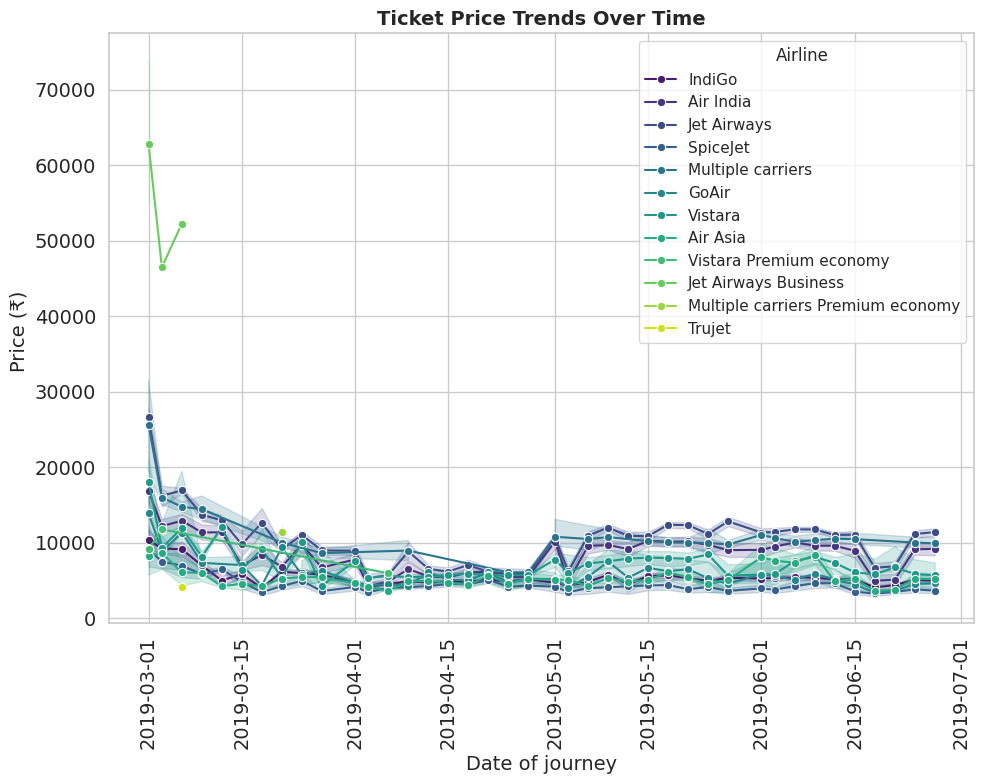

In [165]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(10, 8))
sns.lineplot(x="Date_of_Journey", y="Price", data=data, hue="Airline", marker="o", palette="viridis") # Changed x to "Date_of_Journey" and y to "Price"

# Add title and labels
plt.title("Ticket Price Trends Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Date of journey", fontsize=14)
plt.ylabel("Price (₹) ", fontsize=14)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
# Show the plot
plt.tight_layout()
plt.show()


The distribution of bookings as the departure date approaches.

Days_Until_Departure
1     165
2     178
3     219
4     193
5     174
6     198
7     199
8     183
9     188
10    209
11    171
12    174
13    188
14    182
15    187
16    166
17    147
18    191
19    190
20    176
21    172
22    191
23    175
24    171
25    183
26    175
27    177
28    171
29    161
30    199
31    210
32    206
33    195
34    177
35    171
36    176
37    175
38    177
39    165
40    171
41    190
42    186
43    151
44    166
45    182
46    199
47    181
48    171
49    178
50    182
51    194
52    194
53    164
54    174
55    159
56    182
57    173
58    203
59    178
Name: count, dtype: int64


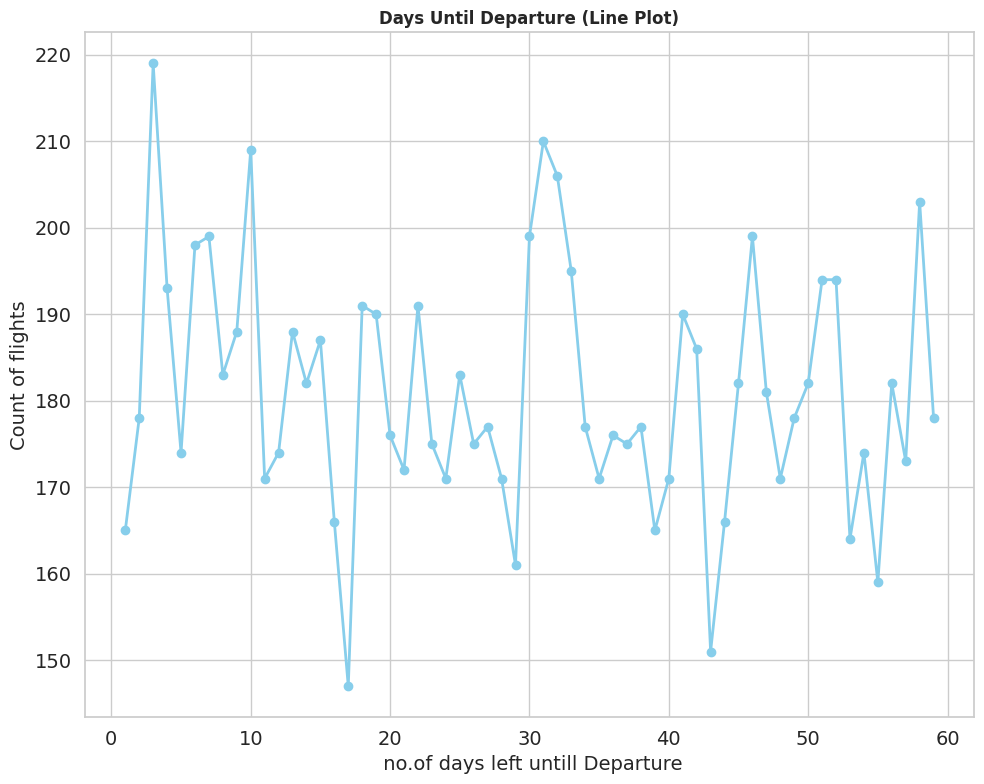

In [166]:
# Assuming 'Days_Until_Departure' is in your data, we first calculate the frequency of each unique value
days_count = data['Days_Until_Departure'].value_counts().sort_index()
print(days_count)
# Create a line plot for 'Days_Until_Departure'
plt.figure(figsize=(10,8))
plt.plot(days_count.index, days_count.values, marker='o', color='skyblue', linewidth=2)

# Add title and labels
plt.title('Days Until Departure (Line Plot)', fontsize=12, fontweight='bold')
plt.xlabel(' no.of days left untill Departure', fontsize=14)
plt.ylabel('Count of flights', fontsize=14)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# Show the plot
plt.tight_layout()
plt.show()


Should keep this graph in last it would be better

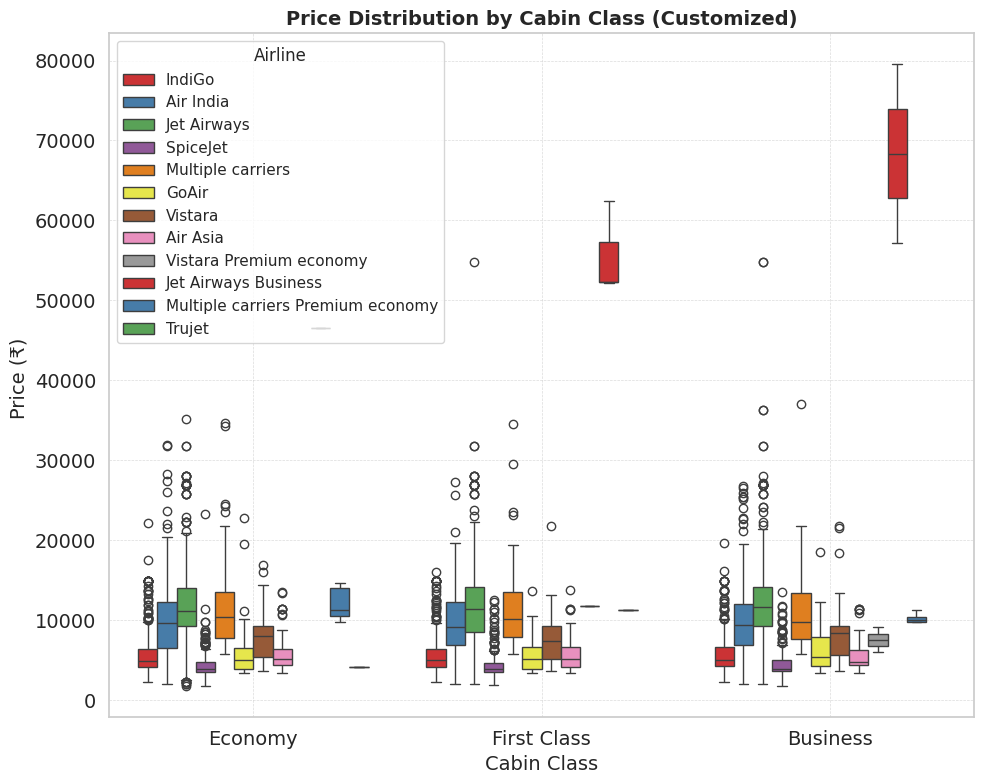

In [167]:
# Set style
sns.set(style="whitegrid")

# Create a boxplot with hue for another variable (e.g., Flight Type)
plt.figure(figsize=(10, 8))
#sns.boxplot(x="Cabin_Class", y="Price", data=data, palette=["#3498db", "#e74c3c"], hue="Airline")
sns.boxplot(x="Cabin_Class", y="Price", data=data, palette="Set1",hue="Airline")

# Customize title, labels, and grid lines
plt.title("Price Distribution by Cabin Class (Customized)", fontsize=14, fontweight='bold')
plt.xlabel("Cabin Class", fontsize=14)
plt.ylabel("Price (₹) ", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Show the plot
plt.tight_layout()
plt.show()


 Visualisation of Price Distribution by Cabin Class

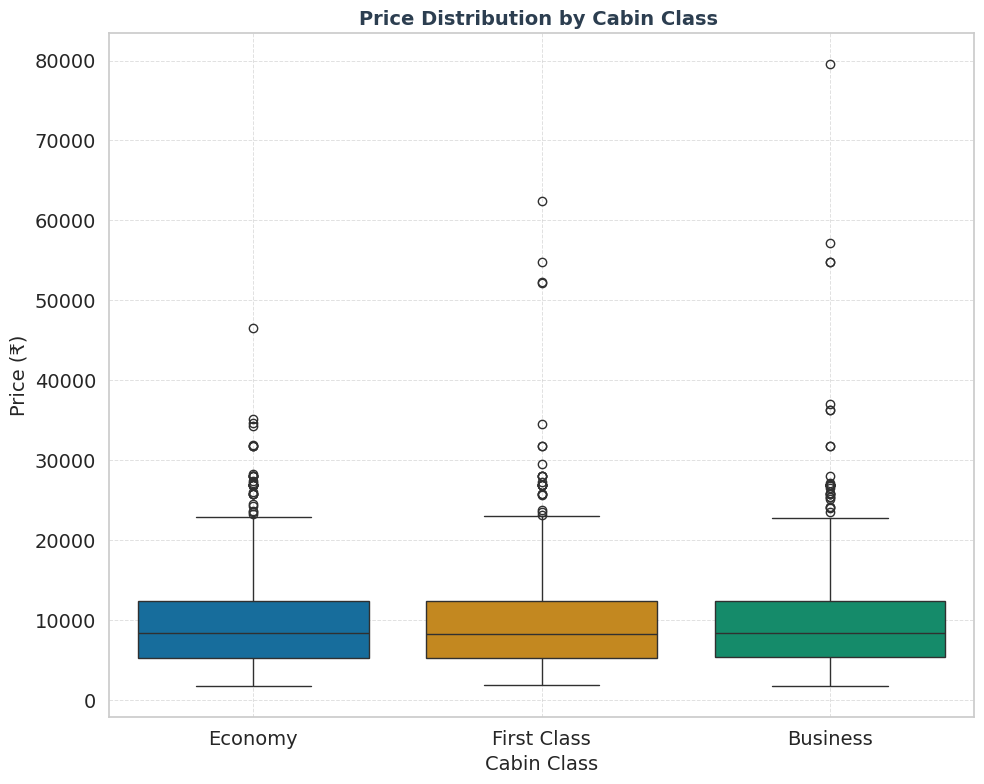

In [168]:
# Set style for a clean, modern look
sns.set(style="whitegrid")

# Create the boxplot for Cabin Class vs Price
plt.figure(figsize=(10, 8))
sns.boxplot(x="Cabin_Class", y="Price", data=data, palette="colorblind",hue ="Cabin_Class" )

# Customize title, labels, and grid lines
plt.title("Price Distribution by Cabin Class ", fontsize=14, fontweight='bold', color="#2c3e50")
plt.xlabel("Cabin Class", fontsize=14)
plt.ylabel("Price (₹)", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Show the plot
plt.tight_layout()
plt.show()


  Visualisation of Airline Price Distribution

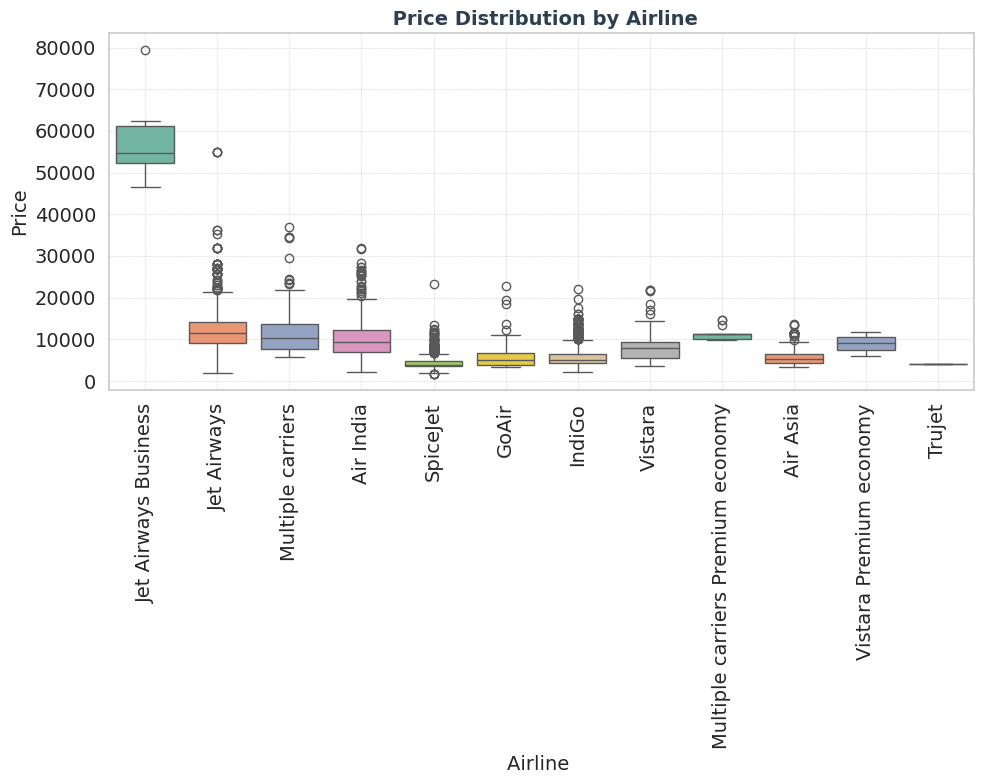

In [169]:
# Set style for a clean, modern look
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x="Airline", y="Price", data=data.sort_values('Price', ascending=False), hue="Airline",palette="Set2")

# Customize title, labels, and grid lines with emojis
plt.title(" Price Distribution by Airline", fontsize=14, fontweight='bold', color="#2c3e50")
plt.xlabel("Airline ", fontsize=14)
plt.ylabel("Price", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation = 90, fontsize=14)
plt.yticks(fontsize=14)
# Add grid lines for readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Visualizing the Correlation Matrix of Flight Fare Dataset

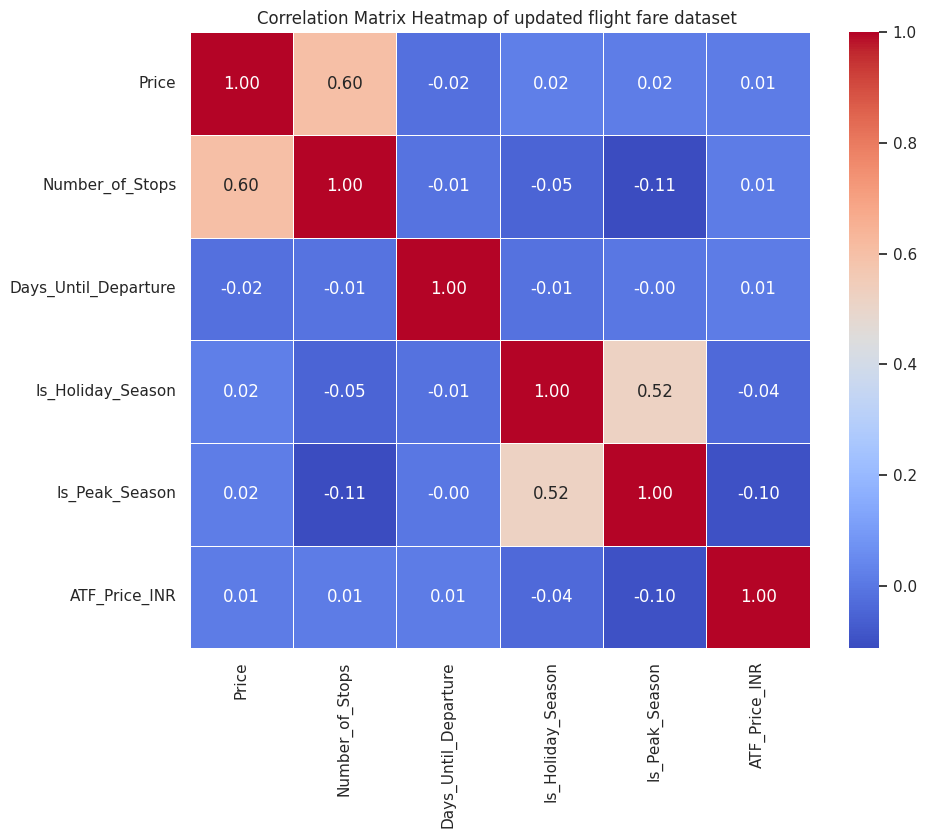

In [170]:
# Load the dataset
file_path = "Updated_Flight_Fare_Data.xlsx"  # Update with your correct file path
data = pd.read_excel(file_path)

# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)  # Ensures only numeric columns are considered

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap of updated flight fare dataset ")
plt.show()


In [171]:
 #Top 10 used Routes and visualize using barplot

most_used_routes = data["Route"].value_counts().sort_values(ascending = False)[:10]
most_used_routes

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
Name: count, dtype: int64

visualisation of top 10 most used routes using bar plot

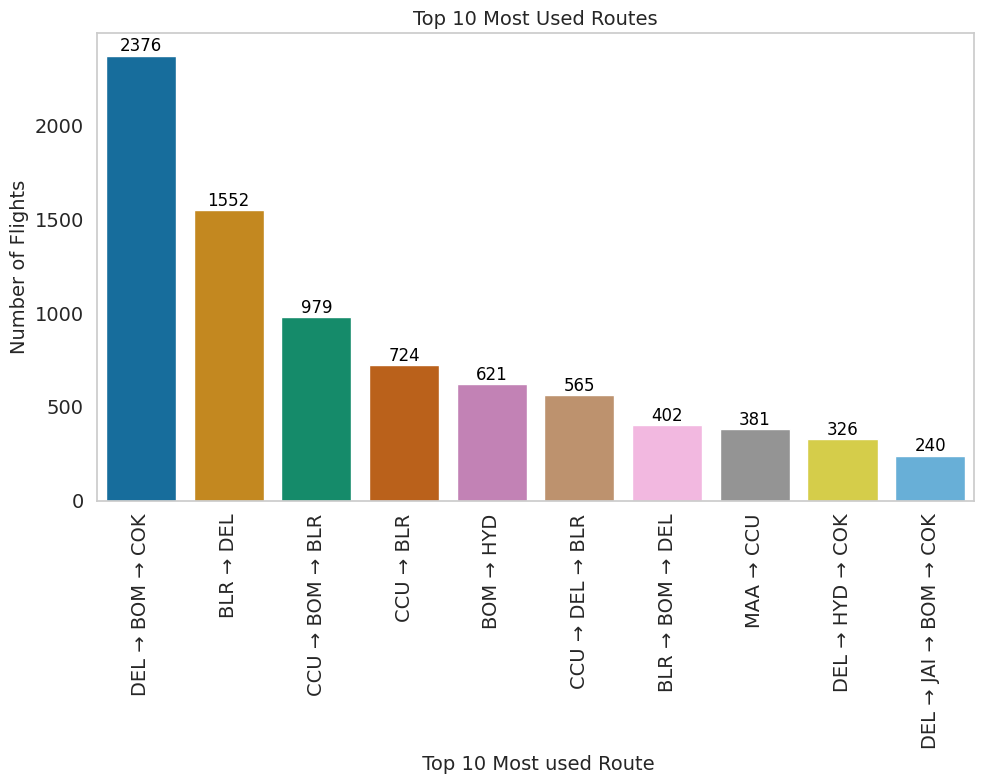

In [172]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=most_used_routes.index, y=most_used_routes.values, palette="colorblind",hue=most_used_routes.index)
# Customize the title and labels
plt.title('Top 10 Most Used Routes', fontsize=14)
plt.xlabel(' Top 10 Most used Route', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)

plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
# Add value labels on bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1,  # adjust +1 as needed
            f'{int(height)}', ha='center', va='bottom', fontsize=12, color='black',)
plt.grid(False)
# Show the plot
plt.tight_layout()
plt.show()

 Impact of Fuel Price on Flight Price

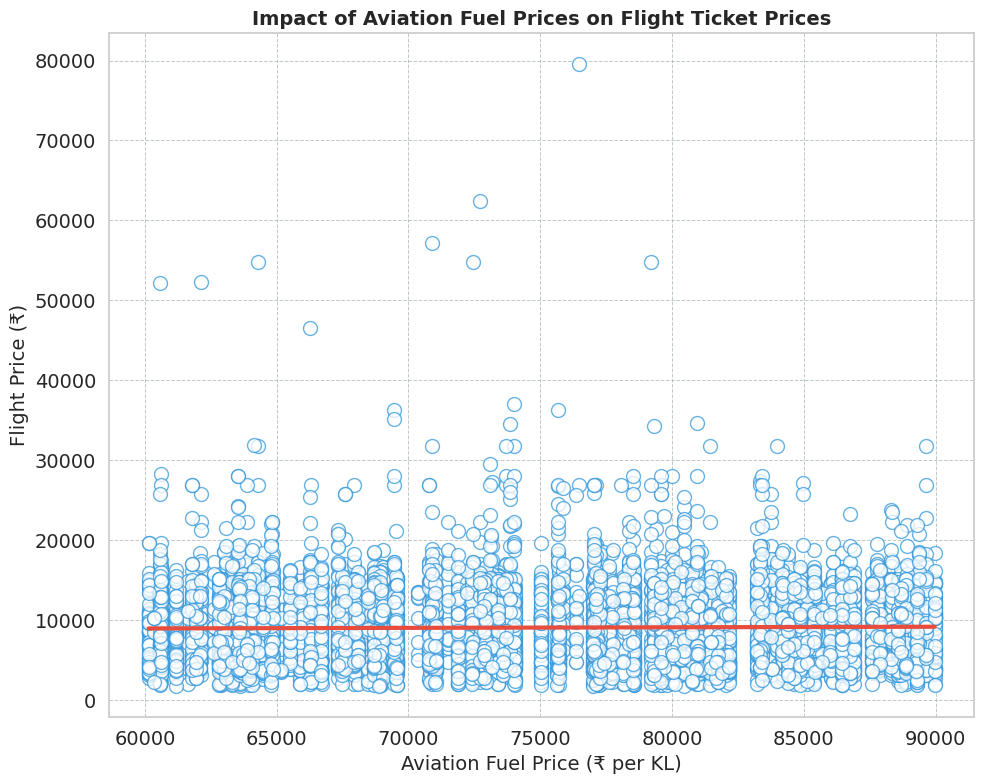

In [173]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(10, 8))

# Define color palette
scatter_color = "#3498db"  # Blue
line_color = "#e74c3c"  # Red

# Create scatter plot with regression line
sns.regplot(
    x="ATF_Price_INR", y="Price", data=data, color=scatter_color,
    scatter_kws={"s": 100, "facecolors": "white", "edgecolor": scatter_color, "alpha": 0.75},
    line_kws={"color": line_color, "linewidth": 3}
)

# Customize title and labels
plt.title("Impact of Aviation Fuel Prices on Flight Ticket Prices", fontsize=14,fontweight="bold")
plt.xlabel("Aviation Fuel Price (₹ per KL)", fontsize=14)
plt.ylabel("Flight Price (₹)", fontsize=14)

# Grid styling
plt.grid(True, linestyle='dashed', linewidth=0.7, alpha=0.6, color="#95a5a6")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Optimize layout
plt.tight_layout()

# Display the plot
plt.show()


Feature Engineering after updating the data set

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Airline               10683 non-null  object        
 1   Date_of_Journey       10683 non-null  datetime64[ns]
 2   Source                10683 non-null  object        
 3   Destination           10683 non-null  object        
 4   Route                 10682 non-null  object        
 5   Dep_Time              10683 non-null  object        
 6   Arrival_Time          10683 non-null  object        
 7   Duration              10683 non-null  object        
 8   Total_Stops           10682 non-null  object        
 9   Additional_Info       10683 non-null  object        
 10  Price                 10683 non-null  int64         
 11  Cabin_Class           10683 non-null  object        
 12  Number_of_Stops       10683 non-null  int64         
 13  Flight_Layover  

In [175]:
#checking missing values
data.isnull().sum()

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Route                   1
Dep_Time                0
Arrival_Time            0
Duration                0
Total_Stops             1
Additional_Info         0
Price                   0
Cabin_Class             0
Number_of_Stops         0
Flight_Layover          0
Booking_Date            0
Days_Until_Departure    0
Is_Holiday_Season       0
Is_Peak_Season          0
ATF_Price_INR           0
dtype: int64

In [176]:
## Display the data types of each column in the dataset
data.dtypes

Airline                         object
Date_of_Journey         datetime64[ns]
Source                          object
Destination                     object
Route                           object
Dep_Time                        object
Arrival_Time                    object
Duration                        object
Total_Stops                     object
Additional_Info                 object
Price                            int64
Cabin_Class                     object
Number_of_Stops                  int64
Flight_Layover                  object
Booking_Date            datetime64[ns]
Days_Until_Departure             int64
Is_Holiday_Season                int64
Is_Peak_Season                   int64
ATF_Price_INR                  float64
dtype: object

In [177]:
# Retrieve the unique values present in the 'Date_of_Journey' column
data["Date_of_Journey"].unique()

<DatetimeArray>
['2019-03-24 00:00:00', '2019-05-01 00:00:00', '2019-06-09 00:00:00',
 '2019-05-12 00:00:00', '2019-03-01 00:00:00', '2019-06-24 00:00:00',
 '2019-03-12 00:00:00', '2019-05-27 00:00:00', '2019-06-01 00:00:00',
 '2019-04-18 00:00:00', '2019-05-09 00:00:00', '2019-04-24 00:00:00',
 '2019-03-03 00:00:00', '2019-04-15 00:00:00', '2019-06-12 00:00:00',
 '2019-03-06 00:00:00', '2019-03-21 00:00:00', '2019-04-03 00:00:00',
 '2019-05-06 00:00:00', '2019-05-15 00:00:00', '2019-06-18 00:00:00',
 '2019-06-15 00:00:00', '2019-04-06 00:00:00', '2019-05-18 00:00:00',
 '2019-06-27 00:00:00', '2019-05-21 00:00:00', '2019-06-03 00:00:00',
 '2019-03-15 00:00:00', '2019-05-03 00:00:00', '2019-03-09 00:00:00',
 '2019-06-06 00:00:00', '2019-05-24 00:00:00', '2019-04-01 00:00:00',
 '2019-04-21 00:00:00', '2019-06-21 00:00:00', '2019-03-27 00:00:00',
 '2019-03-18 00:00:00', '2019-04-12 00:00:00', '2019-04-09 00:00:00',
 '2019-04-27 00:00:00']
Length: 40, dtype: datetime64[ns]

In [178]:
# Ensure 'Date of Journey' is in datetime format
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
#errors='coerce')

# Extract date components
data['Day'] = data['Date_of_Journey'].dt.day
data['Month'] = data['Date_of_Journey'].dt.month
data['Year'] = data['Date_of_Journey'].dt.year

print(data.head(2))
#droping the column is optional
data.drop("Date_of_Journey", inplace=True, axis=1)



     Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   

  Cabin_Class  Number_of_Stops Flight_Layover Booking_Date  \
0     Economy                1      1 Stop(s)   2019-02-18   
1     Economy                3      3 Stop(s)   2019-04-02   

   Days_Until_Departure  Is_Holiday_Season  Is_Peak_Season  ATF_Price_INR  \
0                    34                  0               1   69462.850528   
1                    29                  1               1   80022.311399   

   Day  Month  Year  
0   24      3  2019  
1    1      5  2019  


 Function to extract hour and minute components from a datetime column


In [179]:
def extract_hour_min(data,col):
  # Ensure the column is in datetime format before using .dt accessor
    data[col] = pd.to_datetime(data[col])
    data[col+"_hour"]=data[col].dt.hour
    data[col+"_minute"]=data[col].dt.minute
    return data.head(2)

In [180]:
# Apply the extract_hour_min function to extract hour and minute from the 'Dep_Time' column

extract_hour_min(data, "Dep_Time")

<ipython-input-179-e34e52dae364>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])


Airline    Source Destination                  Route            Dep_Time  \
0     IndiGo  Banglore   New Delhi              BLR → DEL 2025-04-10 22:20:00   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR 2025-04-10 05:50:00   

   Arrival_Time Duration Total_Stops Additional_Info  Price Cabin_Class  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897     Economy   
1         13:15   7h 25m     2 stops         No info   7662     Economy   

   Number_of_Stops Flight_Layover Booking_Date  Days_Until_Departure  \
0                1      1 Stop(s)   2019-02-18                    34   
1                3      3 Stop(s)   2019-04-02                    29   

   Is_Holiday_Season  Is_Peak_Season  ATF_Price_INR  Day  Month  Year  \
0                  0               1   69462.850528   24      3  2019   
1                  1               1   80022.311399    1      5  2019   

   Dep_Time_hour  Dep_Time_minute  
0             22               20  
1              5               50

In [181]:
# Extract hour and minute from the 'Arrival_Time' column using the extract_hour_min function

extract_hour_min(data, "Arrival_Time")

<ipython-input-179-e34e52dae364>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])


Airline    Source Destination                  Route            Dep_Time  \
0     IndiGo  Banglore   New Delhi              BLR → DEL 2025-04-10 22:20:00   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR 2025-04-10 05:50:00   

         Arrival_Time Duration Total_Stops Additional_Info  Price Cabin_Class  \
0 2025-03-22 01:10:00   2h 50m    non-stop         No info   3897     Economy   
1 2025-04-10 13:15:00   7h 25m     2 stops         No info   7662     Economy   

   Number_of_Stops Flight_Layover Booking_Date  Days_Until_Departure  \
0                1      1 Stop(s)   2019-02-18                    34   
1                3      3 Stop(s)   2019-04-02                    29   

   Is_Holiday_Season  Is_Peak_Season  ATF_Price_INR  Day  Month  Year  \
0                  0               1   69462.850528   24      3  2019   
1                  1               1   80022.311399    1      5  2019   

   Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  
0             22               20                  1                   10  
1              5               50                 13                   15

now we can drop the dep_time and arrival time as well

In [182]:
cols_to_drop =['Arrival_Time', 'Dep_Time']
data.drop(cols_to_drop, axis=1, inplace=True)

In [183]:
data.head(2)

Airline    Source Destination                  Route Duration  \
0     IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   

  Total_Stops Additional_Info  Price Cabin_Class  Number_of_Stops  \
0    non-stop         No info   3897     Economy                1   
1     2 stops         No info   7662     Economy                3   

  Flight_Layover Booking_Date  Days_Until_Departure  Is_Holiday_Season  \
0      1 Stop(s)   2019-02-18                    34                  0   
1      3 Stop(s)   2019-04-02                    29                  1   

   Is_Peak_Season  ATF_Price_INR  Day  Month  Year  Dep_Time_hour  \
0               1   69462.850528   24      3  2019             22   
1               1   80022.311399    1      5  2019              5   

   Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  
0               20                  1                   10  
1               50                 13                   15

In [184]:
data["Booking_Date"].unique()

<DatetimeArray>
['2019-02-18 00:00:00', '2019-04-02 00:00:00', '2019-04-24 00:00:00',
 '2019-04-20 00:00:00', '2019-01-06 00:00:00', '2019-06-20 00:00:00',
 '2019-03-03 00:00:00', '2019-01-11 00:00:00', '2019-01-26 00:00:00',
 '2019-04-14 00:00:00',
 ...
 '2019-06-25 00:00:00', '2019-06-21 00:00:00', '2019-06-17 00:00:00',
 '2019-06-24 00:00:00', '2019-06-12 00:00:00', '2019-06-14 00:00:00',
 '2019-06-19 00:00:00', '2019-01-01 00:00:00', '2019-01-08 00:00:00',
 '2019-01-02 00:00:00']
Length: 177, dtype: datetime64[ns]

Function to categorize flight departure time into different time slots based on the hour


In [185]:
def flight_dep_time(x):
    if (x > 4) and (x <= 8):
        return "Early Morning"
    elif (x > 8) and (x <= 12):
        return "Morning"
    elif (x > 12) and (x <= 16):
        return "Noon"
    elif (x > 16) and (x <= 20):
        return "Evening"
    elif (x > 20) and (x <= 24):
        return "Night"
    else:
        return "late night"  # Corrected indentation

Number of Flights Departing at Different Times

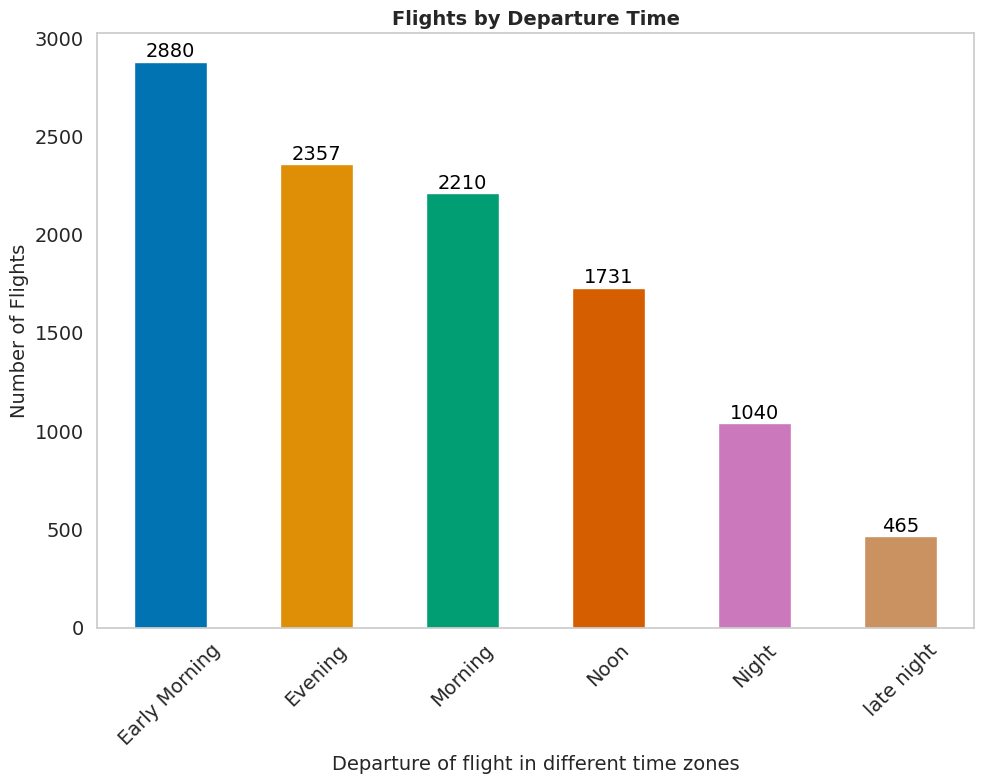

In [186]:
# Create the bar plot
plt.figure(figsize=(10, 8))
ax=data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar", color=sns.color_palette("colorblind")) # Pass the color palette using 'color'

# Add value labels on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1,
            f'{int(height)}', ha='center', va='bottom', fontsize=14, color='black')

# Add axis labels and title
plt.xlabel("Departure of flight in different time zones", fontsize=14,)
plt.ylabel("Number of Flights", fontsize=14)
plt.title("Flights by Departure Time", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
ax.grid(False)

plt.tight_layout()
plt.show()


In [187]:
data.head(2)

Airline    Source Destination                  Route Duration  \
0     IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   

  Total_Stops Additional_Info  Price Cabin_Class  Number_of_Stops  \
0    non-stop         No info   3897     Economy                1   
1     2 stops         No info   7662     Economy                3   

  Flight_Layover Booking_Date  Days_Until_Departure  Is_Holiday_Season  \
0      1 Stop(s)   2019-02-18                    34                  0   
1      3 Stop(s)   2019-04-02                    29                  1   

   Is_Peak_Season  ATF_Price_INR  Day  Month  Year  Dep_Time_hour  \
0               1   69462.850528   24      3  2019             22   
1               1   80022.311399    1      5  2019              5   

   Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  
0               20                  1                   10  
1               50                 13                   15

function adds '0h' if hours are missing, and '0m' if minutes are missing in the duration.


In [188]:
def prepocess_duration(x):
  if 'h' not in x:
      x = '0h'+' '+ x
  elif 'm' not in x:
      x = x + ' '+'0m'
  return x

In [189]:
# Applies the 'preprocess_duration' function to ensure the 'Duration' column has both hours and minutes.

data['Duration']=data['Duration'].apply(prepocess_duration)

In [190]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

 Extracts hours and minutes from the 'Duration' column, removes 'h' and 'm',
 and converts them into integers

In [191]:
data['Duration_hours'] = data['Duration'].str.split(' ').str[0].str.replace('h', '').astype(int)
data['Duration_minutes'] = data['Duration'].str.split(' ').str[1].str.replace('m', '').astype(int)

In [192]:
data.head(2)

Airline    Source Destination                  Route Duration  \
0     IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   

  Total_Stops Additional_Info  Price Cabin_Class  Number_of_Stops  \
0    non-stop         No info   3897     Economy                1   
1     2 stops         No info   7662     Economy                3   

  Flight_Layover Booking_Date  Days_Until_Departure  Is_Holiday_Season  \
0      1 Stop(s)   2019-02-18                    34                  0   
1      3 Stop(s)   2019-04-02                    29                  1   

   Is_Peak_Season  ATF_Price_INR  Day  Month  Year  Dep_Time_hour  \
0               1   69462.850528   24      3  2019             22   
1               1   80022.311399    1      5  2019              5   

   Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  Duration_hours  \
0               20                  1                   10               2   
1               50                 13                   15               7   

   Duration_minutes  
0                50  
1                25

In [193]:
# Converts the 'Duration' column into total minutes by multiplying hours by 60 and adding minutes.

data['Duration_total_mins']=data['Duration'].str.replace('h',"*60").str.replace(' ','+').str.replace('m' ,"*1").apply(eval)

Visualizing the Relationship Between Flight Duration, Price, and Total Stops

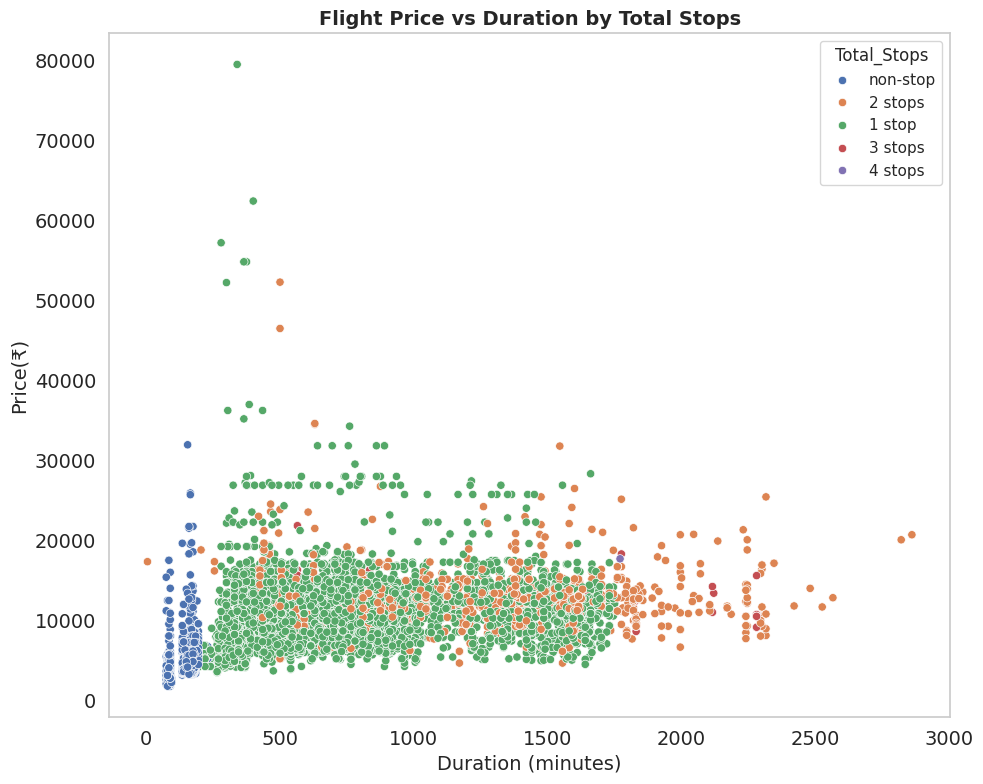

In [194]:
plt.figure(figsize=(10,8))
# Create scatter plot
sns.scatterplot(x="Duration_total_mins", y="Price", hue="Total_Stops", data=data)
plt.title("Flight Price vs Duration by Total Stops", fontsize=14, fontweight="bold")
# Add axis labels
plt.xlabel("Duration (minutes)", fontsize=14)
plt.ylabel("Price(₹)", fontsize=14)
# Remove grid lines
plt.grid(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


Analyzing the Linear Relationship Between Flight Duration and Ticket Price

<Figure size 1000x800 with 0 Axes>

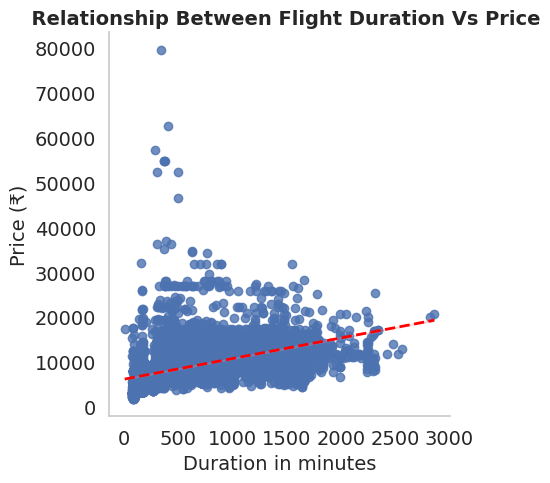

In [195]:
plt.figure(figsize=(10,8))
# Create a linear model plot (scatter plot with regression line)
sns.lmplot(x="Duration_total_mins", y="Price", data=data,
           line_kws={'color': 'red', 'linewidth': 2, 'linestyle': '--'})  # Customize the regression line

plt.title("  Relationship Between Flight Duration Vs Price", fontsize=14,fontweight="bold")
plt.xlabel("Duration in minutes", fontsize=14)
plt.ylabel("Price (₹)", fontsize=14)

# Remove grid lines
plt.grid(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Show the plot
plt.tight_layout()
plt.show()


Extracting Categorical Columns from a Dataset

In [196]:
#Loops through all columns in the DataFrame and appends the names of categorical columns (dtype 'object') to the Categorical_Column list.
Categorical_Column = []
for col in data.columns:
    if data[col].dtype == 'object':
        Categorical_Column.append(col)


In [197]:
print(Categorical_Column)


['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Additional_Info', 'Cabin_Class', 'Flight_Layover']


 Extracting numerical columns from the dataset

In [198]:
Numerical_column = []
for col in data.columns:
    if data[col].dtype != 'object':
        Numerical_column.append(col)
        from sklearn.preprocessing import LabelEncoder





In [199]:
print(Numerical_column)


['Price', 'Number_of_Stops', 'Booking_Date', 'Days_Until_Departure', 'Is_Holiday_Season', 'Is_Peak_Season', 'ATF_Price_INR', 'Day', 'Month', 'Year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours', 'Duration_minutes', 'Duration_total_mins']


In [200]:
#to obtain unique values present in the 'Source' column
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [201]:
# Iterate over each unique value in the 'Source' column to create dummy variables
for sub_category in data['Source'].unique():
#Create a new column for each unique 'Source' category, where 1 indicates the presence of the category, 0 otherwise
  data[f'Source_{sub_category}'] = (data['Source'] == sub_category).astype(int)


In [202]:
data.head(2)

Airline    Source Destination                  Route Duration  \
0     IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   

  Total_Stops Additional_Info  Price Cabin_Class  Number_of_Stops  \
0    non-stop         No info   3897     Economy                1   
1     2 stops         No info   7662     Economy                3   

  Flight_Layover Booking_Date  Days_Until_Departure  Is_Holiday_Season  \
0      1 Stop(s)   2019-02-18                    34                  0   
1      3 Stop(s)   2019-04-02                    29                  1   

   Is_Peak_Season  ATF_Price_INR  Day  Month  Year  Dep_Time_hour  \
0               1   69462.850528   24      3  2019             22   
1               1   80022.311399    1      5  2019              5   

   Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  Duration_hours  \
0               20                  1                   10               2   
1               50                 13                   15               7   

   Duration_minutes  Duration_total_mins  Source_Banglore  Source_Kolkata  \
0                50                  170                1               0   
1                25                  445                0               1   

   Source_Delhi  Source_Chennai  Source_Mumbai  
0             0               0              0  
1             0               0              0

In [203]:
# calculate the average price for each airline and sort the results in ascending order
airlines = data.groupby(['Airline'])['Price'].mean().sort_values()
airlines

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9611.210616
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [204]:
#reseting the index values based on the average price
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [205]:
# Create a dictionary with airlines and their corresponding indices
dict_airlines={key:index for index, key in enumerate(airlines,0)}
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [206]:
## Replace airline names with their corresponding indices from the dictionary
data['Airline']=data['Airline'].map(dict_airlines)
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10683, dtype: int64

In [207]:
data.head(2)

Airline    Source Destination                  Route Duration Total_Stops  \
0        3  Banglore   New Delhi              BLR → DEL   2h 50m    non-stop   
1        7   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m     2 stops   

  Additional_Info  Price Cabin_Class  Number_of_Stops Flight_Layover  \
0         No info   3897     Economy                1      1 Stop(s)   
1         No info   7662     Economy                3      3 Stop(s)   

  Booking_Date  Days_Until_Departure  Is_Holiday_Season  Is_Peak_Season  \
0   2019-02-18                    34                  0               1   
1   2019-04-02                    29                  1               1   

   ATF_Price_INR  Day  Month  Year  Dep_Time_hour  Dep_Time_minute  \
0   69462.850528   24      3  2019             22               20   
1   80022.311399    1      5  2019              5               50   

   Arrival_Time_hour  Arrival_Time_minute  Duration_hours  Duration_minutes  \
0                  1                   10               2                50   
1                 13                   15               7                25   

   Duration_total_mins  Source_Banglore  Source_Kolkata  Source_Delhi  \
0                  170                1               0             0   
1                  445                0               1             0   

   Source_Chennai  Source_Mumbai  
0               0              0  
1               0              0

In [208]:
#Get the unique values in the 'Destination' column
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [209]:
# Replace 'New Delhi' with 'Delhi' in the 'Destination' column and then get the unique values
data['Destination'] = data['Destination'].replace('New Delhi', 'Delhi')
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [210]:
# Get the destinations sorted by their average price
destination = data.groupby(['Destination'])['Price'].mean().sort_values().index
destination

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [211]:
#Create a dictionary with destinations as keys and their indices as values
dict_destination={key:index for index, key in enumerate(destination,0)}
dict_destination

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [212]:
## Replace airline names with their corresponding indices from the dictionary
data['Destination']=data['Destination'].map(dict_destination)
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10683, dtype: int64

In [213]:
data.head(2)

Airline    Source  Destination                  Route Duration Total_Stops  \
0        3  Banglore            2              BLR → DEL   2h 50m    non-stop   
1        7   Kolkata            3  CCU → IXR → BBI → BLR   7h 25m     2 stops   

  Additional_Info  Price Cabin_Class  Number_of_Stops Flight_Layover  \
0         No info   3897     Economy                1      1 Stop(s)   
1         No info   7662     Economy                3      3 Stop(s)   

  Booking_Date  Days_Until_Departure  Is_Holiday_Season  Is_Peak_Season  \
0   2019-02-18                    34                  0               1   
1   2019-04-02                    29                  1               1   

   ATF_Price_INR  Day  Month  Year  Dep_Time_hour  Dep_Time_minute  \
0   69462.850528   24      3  2019             22               20   
1   80022.311399    1      5  2019              5               50   

   Arrival_Time_hour  Arrival_Time_minute  Duration_hours  Duration_minutes  \
0                  1                   10               2                50   
1                 13                   15               7                25   

   Duration_total_mins  Source_Banglore  Source_Kolkata  Source_Delhi  \
0                  170                1               0             0   
1                  445                0               1             0   

   Source_Chennai  Source_Mumbai  
0               0              0  
1               0              0

In [214]:
#Retrieve the unique values present in the 'Total_Stops' column
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

 Create a dictionary mapping unique 'Total_Stops' values to numerical indices for standardization


In [215]:
Total_Stops=data['Total_Stops'].unique()

# Create the dictionary using the unique values
dict_Total_Stops = {key: index for index, key in enumerate(Total_Stops, 0)}
dict_Total_Stops
data.head(2)


Airline    Source  Destination                  Route Duration Total_Stops  \
0        3  Banglore            2              BLR → DEL   2h 50m    non-stop   
1        7   Kolkata            3  CCU → IXR → BBI → BLR   7h 25m     2 stops   

  Additional_Info  Price Cabin_Class  Number_of_Stops Flight_Layover  \
0         No info   3897     Economy                1      1 Stop(s)   
1         No info   7662     Economy                3      3 Stop(s)   

  Booking_Date  Days_Until_Departure  Is_Holiday_Season  Is_Peak_Season  \
0   2019-02-18                    34                  0               1   
1   2019-04-02                    29                  1               1   

   ATF_Price_INR  Day  Month  Year  Dep_Time_hour  Dep_Time_minute  \
0   69462.850528   24      3  2019             22               20   
1   80022.311399    1      5  2019              5               50   

   Arrival_Time_hour  Arrival_Time_minute  Duration_hours  Duration_minutes  \
0                  1                   10               2                50   
1                 13                   15               7                25   

   Duration_total_mins  Source_Banglore  Source_Kolkata  Source_Delhi  \
0                  170                1               0             0   
1                  445                0               1             0   

   Source_Chennai  Source_Mumbai  
0               0              0  
1               0              0

In [216]:
data.head(1)

Airline    Source  Destination      Route Duration Total_Stops  \
0        3  Banglore            2  BLR → DEL   2h 50m    non-stop   

  Additional_Info  Price Cabin_Class  Number_of_Stops Flight_Layover  \
0         No info   3897     Economy                1      1 Stop(s)   

  Booking_Date  Days_Until_Departure  Is_Holiday_Season  Is_Peak_Season  \
0   2019-02-18                    34                  0               1   

   ATF_Price_INR  Day  Month  Year  Dep_Time_hour  Dep_Time_minute  \
0   69462.850528   24      3  2019             22               20   

   Arrival_Time_hour  Arrival_Time_minute  Duration_hours  Duration_minutes  \
0                  1                   10               2                50   

   Duration_total_mins  Source_Banglore  Source_Kolkata  Source_Delhi  \
0                  170                1               0             0   

   Source_Chennai  Source_Mumbai  
0               0              0

In [217]:
#extract unique values
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [218]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

Calculate the percentage distribution of each unique value in the 'Additional_Info' column


In [219]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.114762
In-flight meal not included     18.552841
No check-in baggage included     2.995413
1 Long layover                   0.177853
Change airports                  0.065525
Business class                   0.037443
No Info                          0.028082
1 Short layover                  0.009361
Red-eye flight                   0.009361
2 Long layover                   0.009361
Name: count, dtype: float64

In [220]:
data.head(1)

Airline    Source  Destination      Route Duration Total_Stops  \
0        3  Banglore            2  BLR → DEL   2h 50m    non-stop   

  Additional_Info  Price Cabin_Class  Number_of_Stops Flight_Layover  \
0         No info   3897     Economy                1      1 Stop(s)   

  Booking_Date  Days_Until_Departure  Is_Holiday_Season  Is_Peak_Season  \
0   2019-02-18                    34                  0               1   

   ATF_Price_INR  Day  Month  Year  Dep_Time_hour  Dep_Time_minute  \
0   69462.850528   24      3  2019             22               20   

   Arrival_Time_hour  Arrival_Time_minute  Duration_hours  Duration_minutes  \
0                  1                   10               2                50   

   Duration_total_mins  Source_Banglore  Source_Kolkata  Source_Delhi  \
0                  170                1               0             0   

   Source_Chennai  Source_Mumbai  
0               0              0

Remove the 'Additional_Info', 'Source', 'Route', and 'Duration' columns from the dataset to clean the data


In [221]:
data.drop(columns=['Additional_Info','Source','Route','Duration','Flight_Layover'],axis=1,inplace=True)
data.head(2)

Airline  Destination Total_Stops  Price Cabin_Class  Number_of_Stops  \
0        3            2    non-stop   3897     Economy                1   
1        7            3     2 stops   7662     Economy                3   

  Booking_Date  Days_Until_Departure  Is_Holiday_Season  Is_Peak_Season  \
0   2019-02-18                    34                  0               1   
1   2019-04-02                    29                  1               1   

   ATF_Price_INR  Day  Month  Year  Dep_Time_hour  Dep_Time_minute  \
0   69462.850528   24      3  2019             22               20   
1   80022.311399    1      5  2019              5               50   

   Arrival_Time_hour  Arrival_Time_minute  Duration_hours  Duration_minutes  \
0                  1                   10               2                50   
1                 13                   15               7                25   

   Duration_total_mins  Source_Banglore  Source_Kolkata  Source_Delhi  \
0                  170                1               0             0   
1                  445                0               1             0   

   Source_Chennai  Source_Mumbai  
0               0              0  
1               0              0

cabin class


In [222]:
data['Cabin_Class'].unique()

array(['Economy', 'First Class', 'Business'], dtype=object)

In [223]:
# Get the unique values of the 'Cabin_Class' column from the DataFrame
Cabin_Class = data['Cabin_Class'].unique()

# Create the dictionary using the unique values
dict_Cabin_Class = {key: index for index, key in enumerate(Cabin_Class, 0)}
dict_Cabin_Class



{'Economy': 0, 'First Class': 1, 'Business': 2}

Convert 'Cabin_Class' values to numerical values using the 'dict_Cabin_Class' mapping


In [224]:
data['Cabin_Class']=data['Cabin_Class'].map(dict_Cabin_Class)
data['Cabin_Class']

0        0
1        0
2        1
3        2
4        0
        ..
10678    0
10679    1
10680    1
10681    1
10682    0
Name: Cabin_Class, Length: 10683, dtype: int64

Create a dictionary to map 'Total_Stops' values to numbers


In [225]:
Total_Stops = data['Total_Stops'].unique()

# Create the dictionary using the unique values
dict_Total_Stops = {key: index for index, key in enumerate(Total_Stops, 0)}
dict_Total_Stops


{'non-stop': 0, '2 stops': 1, '1 stop': 2, '3 stops': 3, nan: 4, '4 stops': 5}

Map 'Total_Stops' values to numerical values using the 'dict_Total_Stops' dictionary


In [226]:
data['Total_Stops']=data['Total_Stops'].map(dict_Total_Stops)
data['Total_Stops']

0        0
1        1
2        1
3        2
4        2
        ..
10678    0
10679    0
10680    0
10681    0
10682    1
Name: Total_Stops, Length: 10683, dtype: int64

Set pandas option to display all columns in the DataFrame for better visibility


In [227]:
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
data


Airline  Destination  Total_Stops  Price  Cabin_Class  Number_of_Stops  \
0            3            2            0   3897            0                1   
1            7            3            1   7662            0                3   
2           10            4            1  13882            1                3   
3            3            3            2   6218            2                2   
4            3            2            2  13302            0                2   
...        ...          ...          ...    ...          ...              ...   
10678        2            3            0   4107            0                1   
10679        7            3            0   4145            1                1   
10680       10            2            0   7229            1                1   
10681        5            2            0  12648            1                1   
10682        7            4            1  11753            0                3   

      Booking_Date  Days_Until_Departure  Is_Holiday_Season  Is_Peak_Season  \
0       2019-02-18                    34                  0               1   
1       2019-04-02                    29                  1               1   
2       2019-04-24                    46                  0               0   
3       2019-04-20                    22                  1               1   
4       2019-01-06                    54                  1               1   
...            ...                   ...                ...             ...   
10678   2019-02-21                    47                  0               1   
10679   2019-03-16                    42                  0               1   
10680   2019-04-04                    23                  0               1   
10681   2019-02-20                     9                  1               1   
10682   2019-04-23                    16                  0               0   

       ATF_Price_INR  Day  Month  Year  Dep_Time_hour  Dep_Time_minute  \
0       69462.850528   24      3  2019             22               20   
1       80022.311399    1      5  2019              5               50   
2       68923.108526    9      6  2019              9               25   
3       88582.470346   12      5  2019             18                5   
4       79376.823392    1      3  2019             16               50   
...              ...  ...    ...   ...            ...              ...   
10678   73158.045404    9      4  2019             19               55   
10679   82177.907382   27      4  2019             20               45   
10680   81489.816124   27      4  2019              8               20   
10681   77105.903113    1      3  2019             11               30   
10682   80984.378260    9      5  2019             10               55   

       Arrival_Time_hour  Arrival_Time_minute  Duration_hours  \
0                      1                   10               2   
1                     13                   15               7   
2                      4                   25              19   
3                     23                   30               5   
4                     21                   35               4   
...                  ...                  ...             ...   
10678                 22                   25               2   
10679                 23                   20               2   
10680                 11                   20               3   
10681                 14                   10               2   
10682                 19                   15               8   

       Duration_minutes  Duration_total_mins  Source_Banglore  Source_Kolkata  \
0                    50                  170                1               0   
1                    25                  445                0               1   
2                     0                 1140                0               0   
3                    25                  325                0               1   
4         

Identifying Outliers in the 'Price' Column Using the IQR (Interquartile Range) Method


In [228]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers of the price
outliers= data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]
outliers

Airline  Destination  Total_Stops  Price  Cabin_Class  Number_of_Stops  \
123          7            4            2  27430            0                2   
396          8            4            2  36983            2                2   
486         10            2            2  26890            2                2   
510         10            2            2  26890            1                2   
597          7            1            1  25139            2                3   
...        ...          ...          ...    ...          ...              ...   
10353       10            1            1  24210            2                3   
10364       11            2            2  57209            2                2   
10383       10            2            2  26890            0                2   
10439       10            2            2  31825            2                2   
10511        7            2            1  26480            2                3   

      Booking_Date  Days_Until_Departure  Is_Holiday_Season  Is_Peak_Season  \
123     2019-01-19                    41                  1               1   
396     2019-02-28                     1                  1               1   
486     2019-01-31                    29                  1               1   
510     2019-02-02                    27                  1               1   
597     2019-01-23                    42                  0               1   
...            ...                   ...                ...             ...   
10353   2019-01-25                    40                  0               1   
10364   2019-02-19                    10                  1               1   
10383   2019-02-11                    18                  1               1   
10439   2019-02-19                    10                  1               1   
10511   2019-01-12                    48                  1               1   

       ATF_Price_INR  Day  Month  Year  Dep_Time_hour  Dep_Time_minute  \
123     83344.702528    1      3  2019             23                0   
396     73989.323186    1      3  2019             12               50   
486     67936.668363    1      3  2019              8               55   
510     73684.509966    1      3  2019              7                0   
597     73844.380868    6      3  2019              9               40   
...              ...  ...    ...   ...            ...              ...   
10353   63548.232776    6      3  2019             19               50   
10364   70911.323128    1      3  2019              9               45   
10383   73110.958614    1      3  2019              7                0   
10439   70911.323128    1      3  2019             18               40   
10511   75866.847593    1      3  2019              6               45   

       Arrival_Time_hour  Arrival_Time_minute  Duration_hours  \
123                   19                   15              20   
396                   19                   15               6   
486                   15                   15               6   
510                   12                   25               5   
597                   15                   15              29   
...                  ...                  ...             ...   
10353                 16                   50              21   
10364                 14                   25               4   
10383                  5                    5              22   
10439                  9                    0              14   
10511                  9                   25              26   

       Duration_minutes  Duration_total_mins  Source_Banglore  Source_Kolkata  \
123                  15                 1215                0               0   
396                  25                  385                0               0   
486                  20                  380                1               0   
510                  25                  325                1               0   
597       

In [229]:
# Print the lower bound value for detecting outliers in the 'Price' column

print(lower_bound)

-5367.0


In [230]:
# Print the upper bound value for detecting outliers in the 'Price' column

print(upper_bound)

23017.0


Visualizing Outliers in 'Price' Column Using Boxplot, Histogram, and Scatterplot


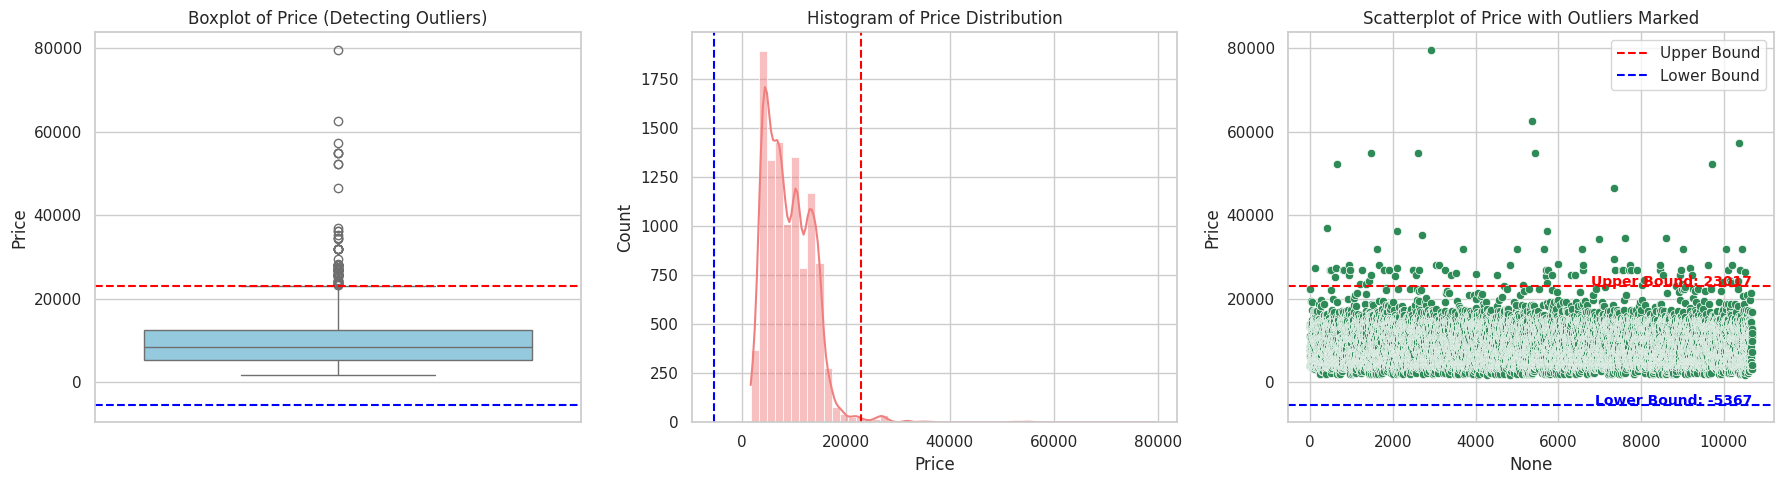

In [231]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot to show outliers
sns.boxplot(y=data['Price'], ax=axes[0], color='skyblue')
axes[0].set_title("Boxplot of Price (Detecting Outliers)")
axes[0].axhline(y=upper_bound, color='red', linestyle='dashed', label="Upper Bound")
axes[0].axhline(y=lower_bound, color='blue', linestyle='dashed', label="Lower Bound")


# Histogram to see price distribution
sns.histplot(data['Price'], bins=50, kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title("Histogram of Price Distribution")
axes[1].axvline(x=upper_bound, color='red', linestyle='dashed', label="Upper Bound")
axes[1].axvline(x=lower_bound, color='blue', linestyle='dashed', label="Lower Bound")


# Scatterplot to identify outliers visually
sns.scatterplot(x=data.index, y=data['Price'], ax=axes[2], color='seagreen')
axes[2].axhline(y=upper_bound, color='red', linestyle='dashed', label="Upper Bound")
axes[2].axhline(y=lower_bound, color='blue', linestyle='dashed', label="Lower Bound")


# Annotate upper and lower bounds in scatterplot
axes[2].text(len(data) - 1, upper_bound, f'Upper Bound: {upper_bound:.0f}',
             color='red', ha='right', fontsize=10, fontweight='bold')
axes[2].text(len(data) - 1, lower_bound, f'Lower Bound: {lower_bound:.0f}',
             color='blue', ha='right', fontsize=10, fontweight='bold')
# Annotate outliers
for idx, row in outliers.iterrows():
    ax.annotate(f"{row['Price']:.0f}",
                     (idx, row['Price']),
                     textcoords="offset points",
                     xytext=(0,10), ha='center',
                     fontsize=9, color='red',
                     arrowprops=dict(arrowstyle="->", color='red'))
axes[2].legend()
axes[2].set_title("Scatterplot of Price with Outliers Marked")

plt.tight_layout()
plt.show()


In [232]:
# Calculate the number of outliers in the 'Price' column

len(outliers)

94

Top features by consedering all the feature

In [233]:
from sklearn.feature_selection import mutual_info_regression

In [234]:
X = data.drop(['Price'], axis=1)  # independent
y = data['Price']  # dependent
# Convert 'Booking_Date' to ordinal before calculating mutual information
X['Booking_Date'] = pd.to_datetime(X['Booking_Date'])  # Ensure it's datetime
X['Booking_Date'] = X['Booking_Date'].apply(lambda date: date.toordinal())

# Now calculate mutual information
imp = mutual_info_regression(X, y)
imp

array([1.31212958, 1.06237085, 0.78048482, 0.        , 0.78671109,
       0.13402907, 0.        , 0.09320161, 0.27108028, 0.0876239 ,
       0.37663421, 0.62978878, 0.        , 0.92756916, 0.75664983,
       1.14509676, 0.90793174, 1.11823465, 0.68032145, 1.78014482,
       0.38719159, 0.45146164, 0.51774904, 0.1418876 , 0.20253546])

In [235]:
imp_df = pd.DataFrame(imp , index=X.columns)
imp_df

0
Airline               1.312130
Destination           1.062371
Total_Stops           0.780485
Cabin_Class           0.000000
Number_of_Stops       0.786711
Booking_Date          0.134029
Days_Until_Departure  0.000000
Is_Holiday_Season     0.093202
Is_Peak_Season        0.271080
ATF_Price_INR         0.087624
Day                   0.376634
Month                 0.629789
Year                  0.000000
Dep_Time_hour         0.927569
Dep_Time_minute       0.756650
Arrival_Time_hour     1.145097
Arrival_Time_minute   0.907932
Duration_hours        1.118235
Duration_minutes      0.680321
Duration_total_mins   1.780145
Source_Banglore       0.387192
Source_Kolkata        0.451462
Source_Delhi          0.517749
Source_Chennai        0.141888
Source_Mumbai         0.202535

In [236]:
imp_df.columns = ['importance']
imp_df

importance
Airline                 1.312130
Destination             1.062371
Total_Stops             0.780485
Cabin_Class             0.000000
Number_of_Stops         0.786711
Booking_Date            0.134029
Days_Until_Departure    0.000000
Is_Holiday_Season       0.093202
Is_Peak_Season          0.271080
ATF_Price_INR           0.087624
Day                     0.376634
Month                   0.629789
Year                    0.000000
Dep_Time_hour           0.927569
Dep_Time_minute         0.756650
Arrival_Time_hour       1.145097
Arrival_Time_minute     0.907932
Duration_hours          1.118235
Duration_minutes        0.680321
Duration_total_mins     1.780145
Source_Banglore         0.387192
Source_Kolkata          0.451462
Source_Delhi            0.517749
Source_Chennai          0.141888
Source_Mumbai           0.202535

In [237]:
imp_df.sort_values(by='importance' , ascending=False)

importance
Duration_total_mins     1.780145
Airline                 1.312130
Arrival_Time_hour       1.145097
Duration_hours          1.118235
Destination             1.062371
Dep_Time_hour           0.927569
Arrival_Time_minute     0.907932
Number_of_Stops         0.786711
Total_Stops             0.780485
Dep_Time_minute         0.756650
Duration_minutes        0.680321
Month                   0.629789
Source_Delhi            0.517749
Source_Kolkata          0.451462
Source_Banglore         0.387192
Day                     0.376634
Is_Peak_Season          0.271080
Source_Mumbai           0.202535
Source_Chennai          0.141888
Booking_Date            0.134029
Is_Holiday_Season       0.093202
ATF_Price_INR           0.087624
Cabin_Class             0.000000
Days_Until_Departure    0.000000
Year                    0.000000

Feature Selection Using Mutual Information to Identify Top Predictive Features for 'Price'


🔹 Top Features based on Mutual Information:
 Duration_total_mins    1.779174
Airline                1.317097
Arrival_Time_hour      1.140389
Duration_hours         1.122747
Destination            1.062279
Dep_Time_hour          0.934691
Arrival_Time_minute    0.902186
Number_of_Stops        0.787944
Total_Stops            0.783144
Dep_Time_minute        0.748974
dtype: float64


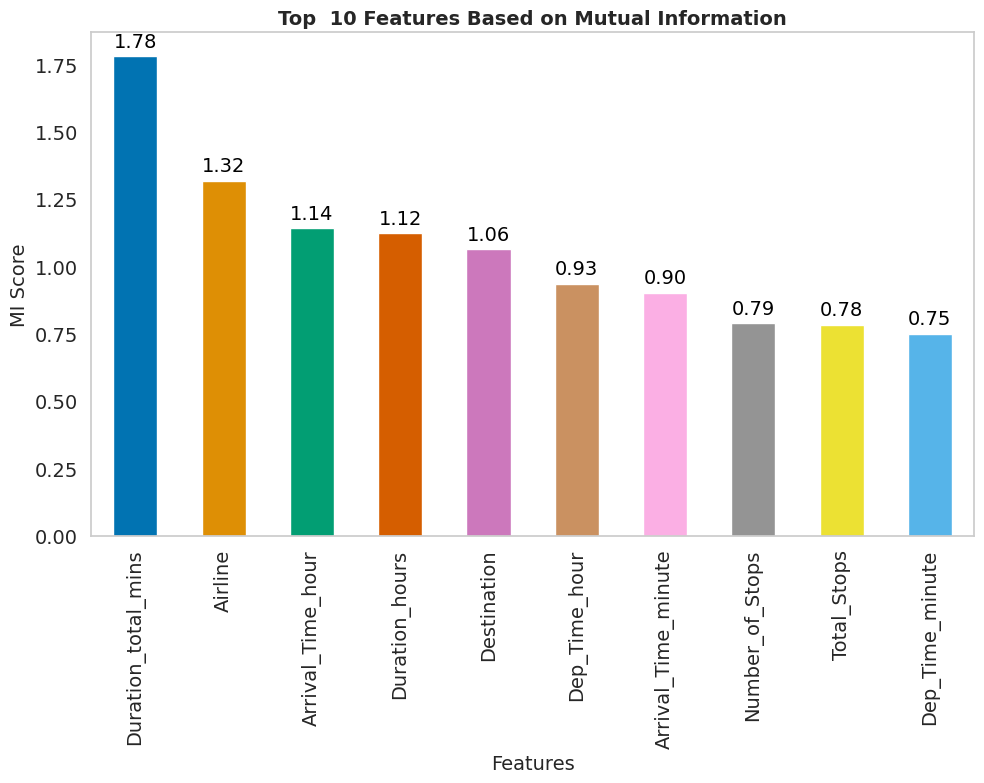

In [238]:
from sklearn.feature_selection import mutual_info_regression

# Assuming `data` is your DataFrame
X = data.drop(['Price'], axis=1)  # independent
y = data['Price']  # dependent

# Convert 'Booking_Date' to ordinal before calculating mutual information
X['Booking_Date'] = pd.to_datetime(X['Booking_Date'])  # Ensure it's datetime
X['Booking_Date'] = X['Booking_Date'].apply(lambda date: date.toordinal())  # Convert to ordinal representation

### 1. Mutual Information
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("🔹 Top Features based on Mutual Information:\n", mi_series.head(10))

# Plot Mutual Information Scores
plt.figure(figsize=(10, 8))
colors = sns.color_palette("colorblind")  # Get the colorblind palette
ax = mi_series.head(10).plot(kind='bar', color=colors)  # Apply the colors


# Title and labels
plt.title("Top  10 Features Based on Mutual Information", fontsize=14,fontweight="bold")
plt.xlabel("Features", fontsize=14)
plt.ylabel("MI Score", fontsize=14)

# Annotate the values on top of the bars
for i, v in enumerate(mi_series.head(10)):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=14, color='black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
# Show the plot
plt.tight_layout()
plt.show()


In [239]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression

Calculate and Visualize Mutual Information Between Features to Identify Relationships
[NO NEED JUST CHECK AT LAST]

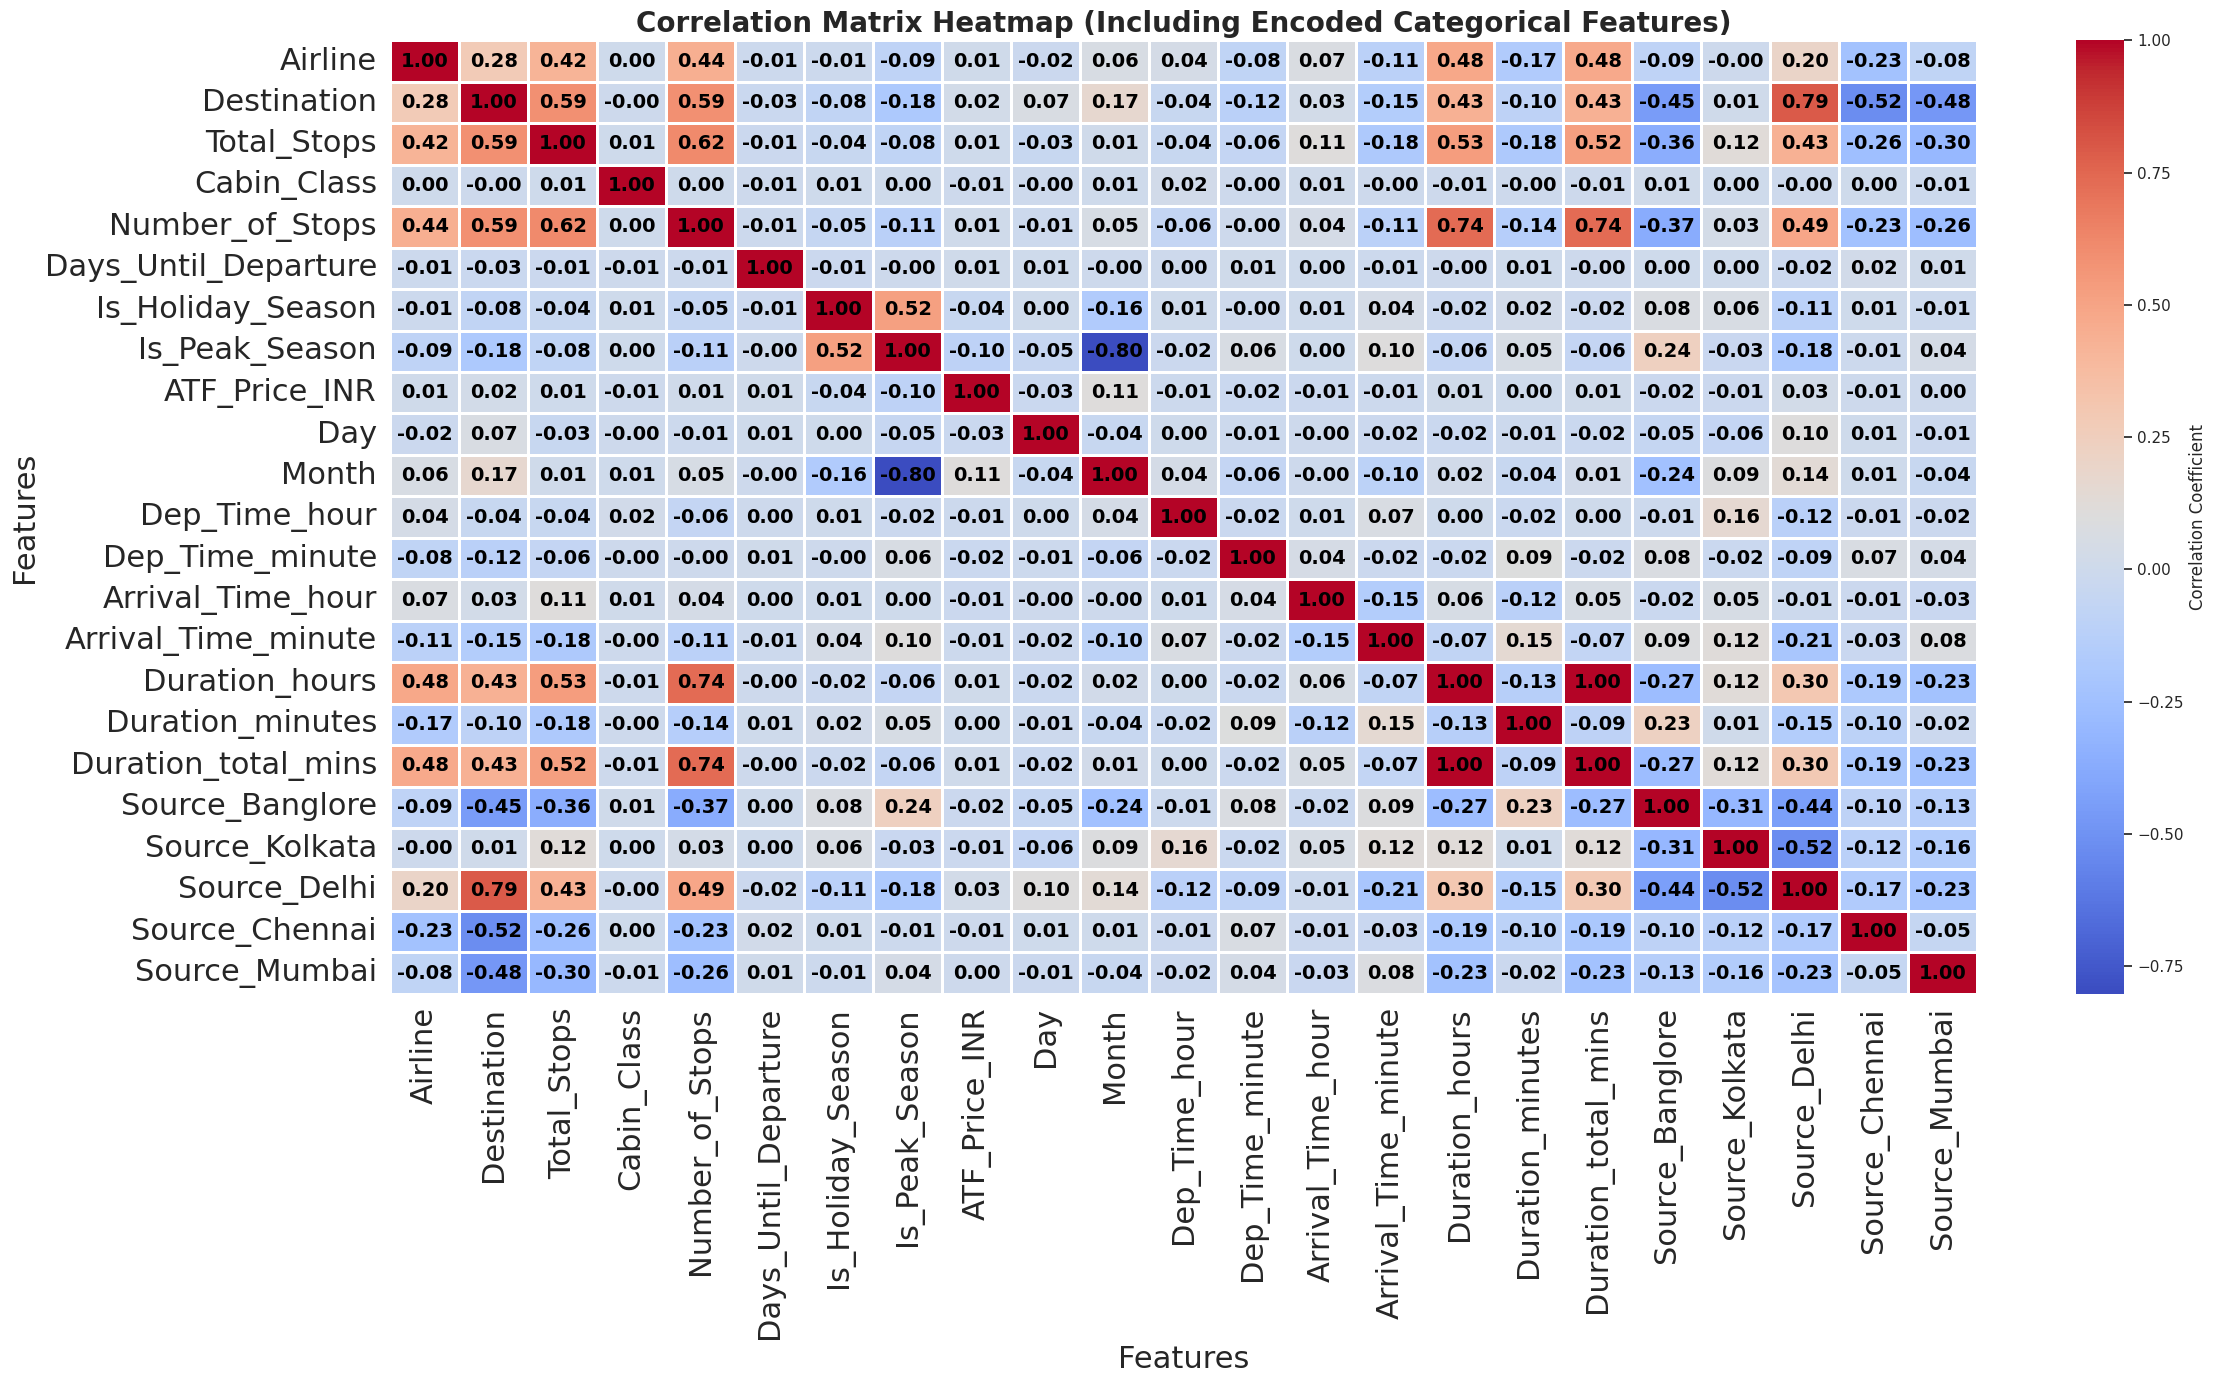

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (assuming it's already in 'data' DataFrame)
X = data.drop(['Price','Year'], axis=1)  # Remove target variable (if applicable)

# Step 1: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical columns

# Step 2: Compute the correlation matrix (numerical columns only)
corr_matrix = X_encoded.corr(numeric_only=True)

# Step 3: Set up the aesthetics of the plot
plt.figure(figsize=(24, 14))  # Larger figure for better clarity

# Create the heatmap with clear visibility of values in the cells
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=1,
                      linecolor='white', cbar_kws={'label': 'Correlation Coefficient'},
                      annot_kws={'size': 14, 'weight': 'bold', 'color': 'black'},
                      cbar=True)  # Show color bar

# Step 4: Adjust title and label fonts for better presentation
plt.title("Correlation Matrix Heatmap (Including Encoded Categorical Features)", fontsize=20, fontweight='bold')
plt.xlabel("Features", fontsize=22)
plt.ylabel("Features", fontsize=22)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Step 5: Adjust layout to avoid overlapping
plt.tight_layout()  # Adjust layout for better spacing

# Show the plot
plt.show()


Perform Recursive Feature Elimination (RFE) to Select Top Features and Visualize Rankings


🔹 RFE Feature Rankings (Lower is better):
 Days_Until_Departure     1
Number_of_Stops          1
Month                    1
Booking_Date             2
Day                      3
Source_Banglore          4
Total_Stops              5
Is_Peak_Season           6
Is_Holiday_Season        7
Source_Mumbai            8
Source_Chennai           9
Airline                 10
Source_Delhi            11
Source_Kolkata          12
Arrival_Time_hour       13
Dep_Time_hour           14
Destination             15
Cabin_Class             16
Dep_Time_minute         17
Duration_minutes        18
Duration_total_mins     19
Arrival_Time_minute     20
Duration_hours          21
ATF_Price_INR           22
dtype: int64

🔹 Top Features Selected by RFE:
 Index(['Number_of_Stops', 'Days_Until_Departure', 'Month'], dtype='object')


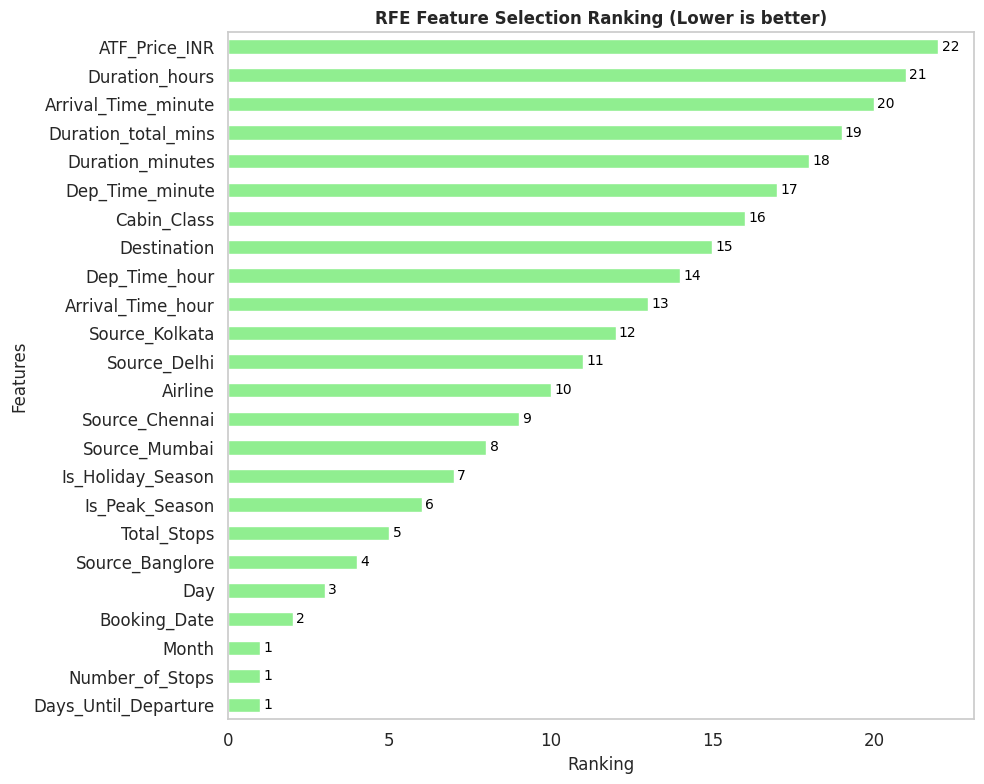

In [241]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Initialize model
model = LinearRegression()

# Apply RFE to select top features
# Convert 'Booking_Date' to ordinal before fitting RFE
X['Booking_Date'] = pd.to_datetime(X['Booking_Date'])  # Ensure it's datetime
X['Booking_Date'] = X['Booking_Date'].apply(lambda date: date.toordinal())

rfe = RFE(model, n_features_to_select=3)
rfe.fit(X, y)

# Get selected features
selected_features_rfe = X.columns[rfe.support_]

# Get feature rankings
feature_rankings = pd.Series(rfe.ranking_, index=X.columns).sort_values()

# Print RFE rankings
print("🔹 RFE Feature Rankings (Lower is better):\n", feature_rankings)

# Print top selected features
print("\n🔹 Top Features Selected by RFE:\n", selected_features_rfe)

# Plot RFE Rankings
plt.figure(figsize=(10, 8))
feature_rankings.plot(kind='barh', color ="lightgreen")

# Annotate the values
for index, value in enumerate(feature_rankings):
    plt.text(value + 0.1, index, str(value), va='center', fontsize=10, color="black")  # Adjust text position as needed

# Title and label
plt.title("RFE Feature Selection Ranking (Lower is better)", fontsize=12, fontweight='bold')
plt.xlabel("Ranking", fontsize=12)
plt.ylabel("Features", fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Remove grid lines
plt.grid(False)

plt.tight_layout()
plt.show()


Feature Importance Evaluation Using Random Forest Model


Top  Features based on Random Forest Importance:
 Duration_total_mins     0.413952
Airline                 0.169239
Day                     0.099456
Month                   0.041968
Booking_Date            0.040680
Duration_hours          0.040257
Arrival_Time_hour       0.026096
Days_Until_Departure    0.021039
ATF_Price_INR           0.019933
Dep_Time_hour           0.019500
Dep_Time_minute         0.016878
Destination             0.015291
Number_of_Stops         0.014961
Arrival_Time_minute     0.014730
Duration_minutes        0.011652
Is_Holiday_Season       0.009451
Cabin_Class             0.006490
Source_Kolkata          0.005069
Total_Stops             0.003793
Source_Delhi            0.003170
Source_Banglore         0.002739
Source_Mumbai           0.001922
Is_Peak_Season          0.001109
Source_Chennai          0.000628
Year                    0.000000
dtype: float64


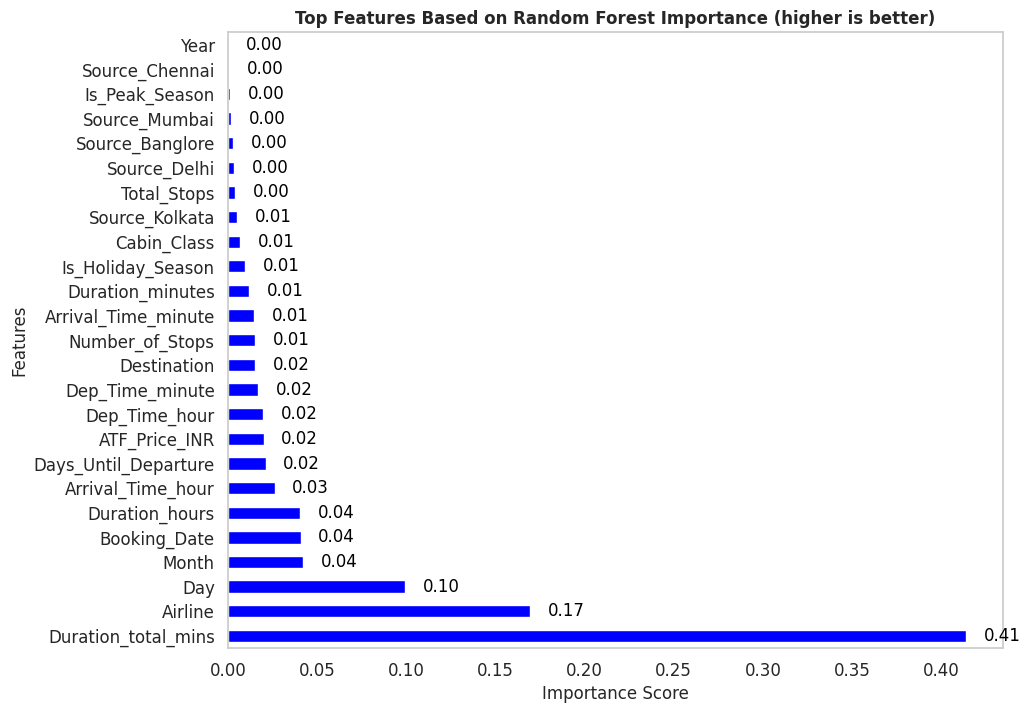

In [242]:
from sklearn.ensemble import RandomForestRegressor
X = data.drop(['Price'], axis=1)  # independent
y = data['Price']  # dependent
### 3. Feature Importance using Random Forest

# Convert 'Booking_Date' to ordinal before fitting the model
X['Booking_Date'] = pd.to_datetime(X['Booking_Date'])  # Ensure it's datetime
X['Booking_Date'] = X['Booking_Date'].apply(lambda date: date.toordinal())

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X, y)
feature_importance = pd.Series(random_forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top  Features based on Random Forest Importance:\n", feature_importance)

# Plot Feature Importances
plt.figure(figsize=(10,8))
feature_importance.plot(kind='barh', color='blue')

# Annotate the values on the bars
for index, value in enumerate(feature_importance):
    plt.text(value + 0.01, index, f'{value:.2f}', ha='left', va='center', fontsize=12, color='black')


plt.title("Top Features Based on Random Forest Importance (higher is better)",fontsize=12,fontweight="bold")
plt.ylabel("Features",fontsize=12)
plt.xlabel("Importance Score",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()

In [243]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression # Import LinearRegression
from sklearn.model_selection import train_test_split  # Import train-test split function
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regressor


In [244]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

ML Pipeline

In [245]:
def predict(ml_model):
    print('Model is: {}'.format(ml_model))

    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))

    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')

    # Compute Metrics
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.2f}%\n")





LinearRegression

In [246]:
predict(LinearRegression())

Model is: LinearRegression()
Training score: 0.5642530037552316
Predictions are: [14000.97967565  9187.47010219 11271.24039686 ... 11522.65802264
 12081.28848469 11511.3096751 ]


R² Score: 0.5868
Mean Absolute Error: 2048.54
Mean Squared Error: 8264031.46
Root Mean Squared Error: 2874.72
Mean Absolute Percentage Error: 26.42%



DecisionTreeRegressor

In [247]:
predict(DecisionTreeRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9999413534392516
Predictions are: [19225. 12395. 11281. ... 16079. 13067. 14817.]


R² Score: 0.7042
Mean Absolute Error: 1316.45
Mean Squared Error: 5914952.39
Root Mean Squared Error: 2432.07
Mean Absolute Percentage Error: 14.74%



RandomForestRegressor

In [248]:
predict(RandomForestRegressor())

Model is: RandomForestRegressor()
Training score: 0.9762371864048837
Predictions are: [19126.08 12486.85 11197.68 ... 13766.65 12764.68 13720.66]


R² Score: 0.8522
Mean Absolute Error: 1126.66
Mean Squared Error: 2956412.44
Root Mean Squared Error: 1719.42
Mean Absolute Percentage Error: 12.98%



In [249]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

In [250]:
#n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
#max_features=['sqrt','log2']
#max_depth=[int(x) for x in np.linspace(5,30,num=4)]
#min_sasmples_split=[5,10,15,100]     I got the r2 value is 79%

XGBRegressor

In [251]:
from xgboost import XGBRegressor
predict(XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=5,subsample=0.8,colsample_bytree=0.8,random_state=100))

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=100, ...)
Training score: 0.865781843662262
Predictions are: [15996.529 12429.201 10938.579 ... 12599.108 12548.601 14373.627]


R² Score: 0.8073
Mean Absolute Error: 1372.17
Mean Squared Error: 3854333.50
Root Mean Squared Error: 1963.25
Mean Absolute Percent

GradientBoostingRegressor

In [252]:
from sklearn.ensemble import GradientBoostingRegressor # Import the GradientBoostingRegressor class
predict(GradientBoostingRegressor())

Model is: GradientBoostingRegressor()
Training score: 0.7918449196714356
Predictions are: [16598.44825058 11921.37263643 12010.55614999 ... 12157.92096224
 12048.6786583  12851.10637459]


R² Score: 0.7720
Mean Absolute Error: 1521.89
Mean Squared Error: 4560161.47
Root Mean Squared Error: 2135.45
Mean Absolute Percentage Error: 18.44%



Hypertuning using xg boost

In [253]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV # Import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=100)

# Define the parameter grid - Corrected indentation
param_dist = {
'n_estimators': [300, 500, 700],
'learning_rate': [0.01, 0.05, 0.07],
'max_depth': [5, 7, 9],
'subsample': [0.8, 1.0],
'colsample_bytree': [0.8, 1.0],
#'learning_rate': [0.01, 0.05, 0.1, 0.2],
#'max_depth': [3, 5, 7, 10],
#'subsample': [0.6, 0.8, 1.0],
#'colsample_bytree': [0.6, 0.8, 1.0]
}
# Randomized Search
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=20,  # Number of combinations to try
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data to find the best hyperparameters
xgb_model = random_search.fit(X_train, y_train) # Fit random_search and assign it to xgb_model

# Predict on Test Data
y_pred = xgb_model.predict(X_test)

# Calculate Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print Evaluation Metrics
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
R² Score: 0.8440
Mean Absolute Error: 1179.77
Mean Squared Error: 3120274.25
Root Mean Squared Error: 1766.43


Distribution of Residuals for Different Regression Models

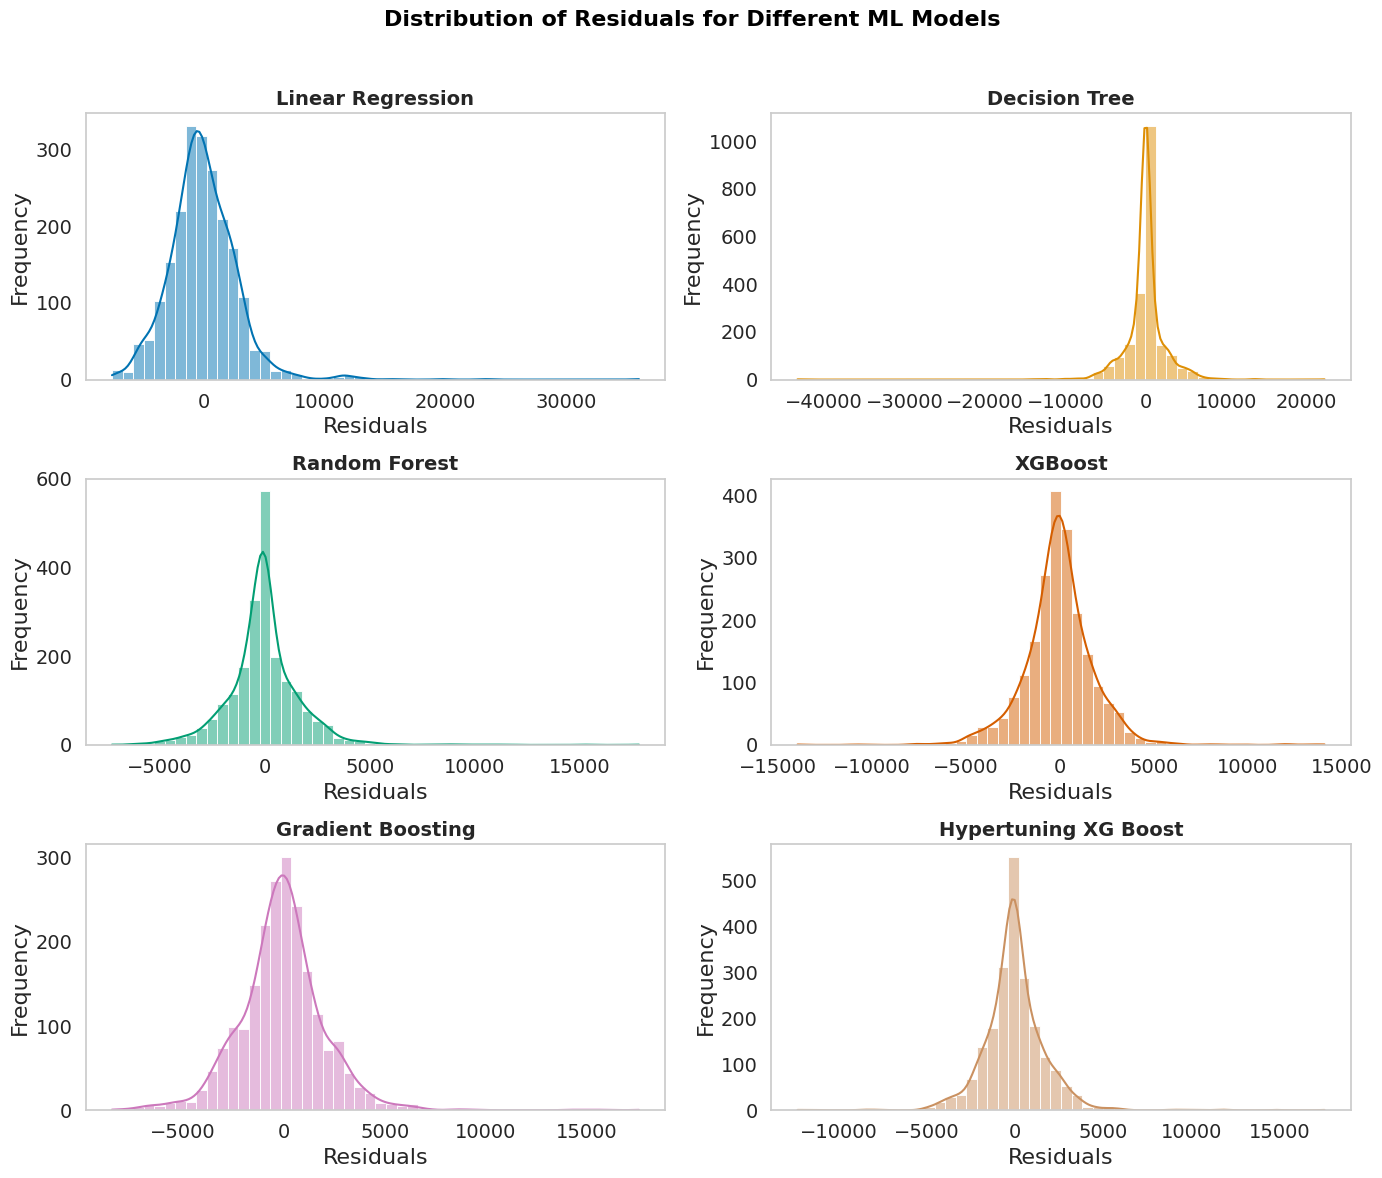

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Set seaborn style for aesthetics
sns.set_style("whitegrid")
#plt.figure(figsize=(14, 12))
# Define the models to be compared
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Hypertuning XG Boost": xgb_model.best_estimator_ # Access the best estimator using .best_estimator_
}


# Set up the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12)) # Create a grid with 3 rows and 2 columns
fig.suptitle("Distribution of Residuals for Different ML Models", fontsize=16, fontweight="bold",color="black")
axes = axes.flatten()  # Flatten for easy indexing

# Loop through each model, fit it, make predictions, and plot residuals
for idx, (model_name, model) in enumerate(models.items()):
   # Fit the model to the training data (X_train, y_train)
    model.fit(X_train, y_train)

   # Make predictions on the test data (X_test)
    predictions = model.predict(X_test)

      # Calculate residuals (difference between actual values and predicted values)
    residuals = y_test - predictions

    # Plot in the corresponding subplot
    sns.histplot(residuals, kde=True, bins=50, ax=axes[idx], color=sns.color_palette("colorblind")[idx])
    axes[idx].set_title(f"{model_name}", fontsize=14,fontweight='bold')
    axes[idx].set_xlabel("Residuals", fontsize=16)
    axes[idx].set_ylabel("Frequency", fontsize=16)

 # Apply x and y ticks font size inside the loop for each subplot
    axes[idx].tick_params(axis='x', labelsize=14)
    axes[idx].tick_params(axis='y', labelsize=14)
# Remove grid lines
for ax in axes:
    ax.grid(False)
# Hide any unused subplots (if total slots > models)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
plt.show()


Performance Metrics Comparison of ML Models

Model Performance Metrics:

                               MSE          MAE        R2         RMSE  \
Linear Regression     8.264031e+06  2048.543957  0.586782  2874.722848   
Decision Tree         6.215310e+06  1350.106458  0.689222  2493.052336   
XGBoost               3.491905e+06  1294.468872  0.825398  1868.663894   
Gradient Boosting     4.566791e+06  1522.894581  0.771651  2137.005160   
Random Forest         2.960030e+06  1125.339457  0.851993  1720.473689   
Hypertuning XG Boost  3.120274e+06  1179.774902  0.843980  1766.429803   

                           MAPE  
Linear Regression     26.419397  
Decision Tree         14.990967  
XGBoost               15.309582  
Gradient Boosting     18.449389  
Random Forest         12.907404  
Hypertuning XG Boost  13.573646  


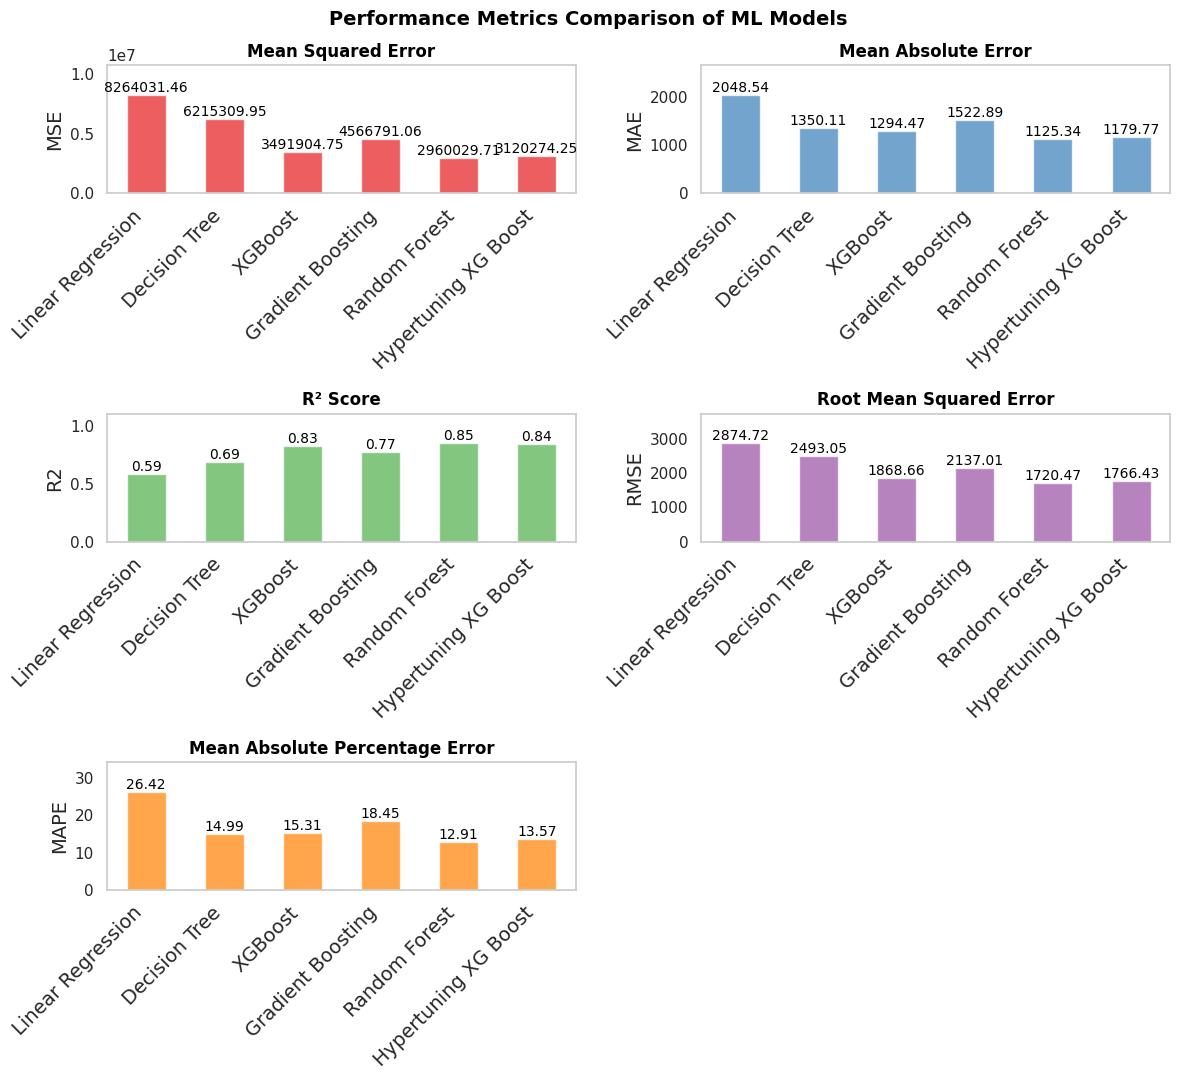

In [255]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBoost": XGBRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Hypertuning XG Boost": xgb_model.best_estimator_ # Access the best estimator using .best_estimator_

}

# Store metrics
metrics = {"MSE": [], "MAE": [], "R2": [], "RMSE": [], "MAPE": []}
model_names = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Append calculated metrics
    metrics["MSE"].append(mse)
    metrics["MAE"].append(mae)
    metrics["R2"].append(r2)
    metrics["RMSE"].append(rmse)
    metrics["MAPE"].append(mape)

    model_names.append(name)

# Define full metric names for better visualization
metric_full_names = {
    "MSE": "Mean Squared Error",
    "MAE": "Mean Absolute Error",
    "R2": "R² Score",
    "RMSE": "Root Mean Squared Error",
    "MAPE": "Mean Absolute Percentage Error"
}
# Convert to DataFrame
df_metrics = pd.DataFrame(metrics, index=model_names)

# Display the performance metrics table
print("Model Performance Metrics:\n")
print(df_metrics)

# Set seaborn style for aesthetics
sns.set_style("whitegrid")
#plt.figure(figsize=(12, 10))

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,11))
fig.suptitle("Performance Metrics Comparison of ML Models", fontsize=14, fontweight="bold",color="black")

metric_names = list(metrics.keys())
colors = sns.color_palette("Set1", 5)  # Using a nice color palette

for i, ax in enumerate(axes.flat[:5]):  # Only using first 5 subplots
    bars = df_metrics[metric_names[i]].plot(kind="bar", ax=ax, color=colors[i], alpha=0.7)

    ax.set_title(metric_full_names[metric_names[i]], fontsize=12, fontweight="bold", color="black")
    ax.set_ylabel(metric_names[i], fontsize=14,)
    ax.set_xticklabels(model_names, rotation=45, ha="right",fontsize=14)
    #ax.yaxis.grid(True, linestyle="--", alpha=0.7)

    # Adjust the Y-axis height (set the Y limits)
    ax.set_ylim(0, max(df_metrics[metric_names[i]]) * 1.3)  # 20% higher than max value for spacing

    # Add value labels to bars
    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',
                ha='center', va='bottom', fontsize=10, color='black')
  # Remove grid lines
    ax.grid(False)
# Hide the empty subplot
axes[2, 1].axis("off")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


In [256]:
# Initialize metrics dictionaries for training and testing
train_metrics = {"MSE": [], "MAE": [], "R2": [], "RMSE": [], "MAPE": []}
test_metrics = {"MSE": [], "MAE": [], "R2": [], "RMSE": [], "MAPE": []}
model_names = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Metrics
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

    train_metrics["MSE"].append(mse_train)
    train_metrics["MAE"].append(mae_train)
    train_metrics["R2"].append(r2_train)
    train_metrics["RMSE"].append(rmse_train)
    train_metrics["MAPE"].append(mape_train)

    # Testing Metrics
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    test_metrics["MSE"].append(mse_test)
    test_metrics["MAE"].append(mae_test)
    test_metrics["R2"].append(r2_test)
    test_metrics["RMSE"].append(rmse_test)
    test_metrics["MAPE"].append(mape_test)

    model_names.append(name)

# Create DataFrames
df_train = pd.DataFrame(train_metrics, index=model_names).add_suffix(" (Train)")
df_test = pd.DataFrame(test_metrics, index=model_names).add_suffix(" (Test)")

# Combine train and test metrics into one table
df_combined = pd.concat([df_train, df_test], axis=1)

# Display the combined metrics table
print("\nModel Performance Metrics on Training and Testing Sets:\n")
print(df_combined.round(3))



Model Performance Metrics on Training and Testing Sets:

                      MSE (Train)  MAE (Train)  R2 (Train)  RMSE (Train)  \
Linear Regression      9399537.87      2051.82        0.56       3065.87   
Decision Tree             1265.07         0.71        1.00         35.57   
XGBoost                 935303.06       700.16        0.96        967.11   
Gradient Boosting      4490132.07      1480.50        0.79       2118.99   
Random Forest           535145.08       427.36        0.98        731.54   
Hypertuning XG Boost   1016555.69       708.78        0.95       1008.24   

                      MAPE (Train)  MSE (Test)  MAE (Test)  R2 (Test)  \
Linear Regression            25.50  8264031.46     2048.54       0.59   
Decision Tree                 0.01  5925018.11     1322.28       0.70   
XGBoost                       8.29  3491904.75     1294.47       0.83   
Gradient Boosting            17.23  4560071.32     1522.19       0.77   
Random Forest                 4.73  2978051.

Plotting learning curve for: Linear Regression


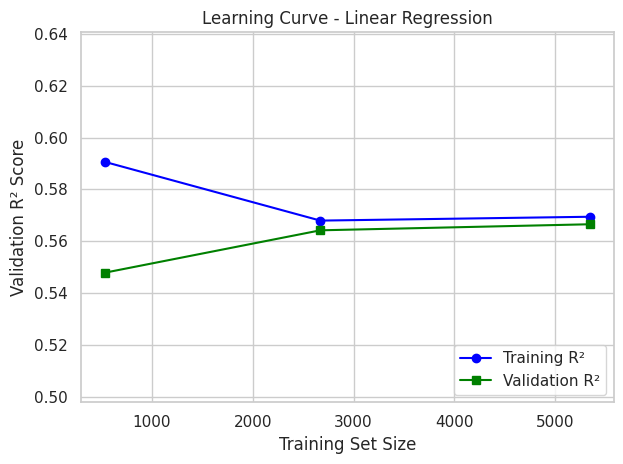

Plotting learning curve for: Decision Tree


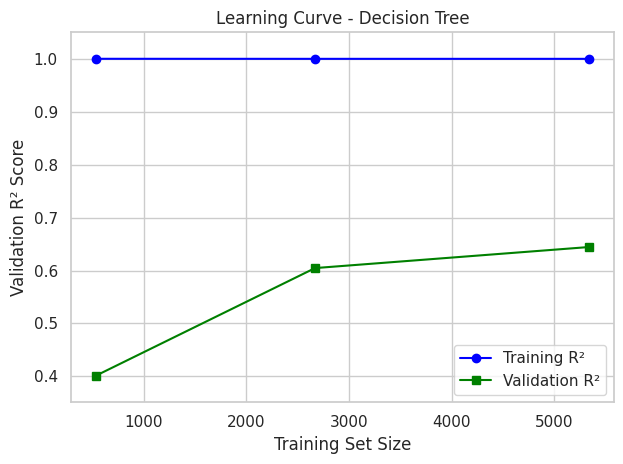

Plotting learning curve for: Random Forest


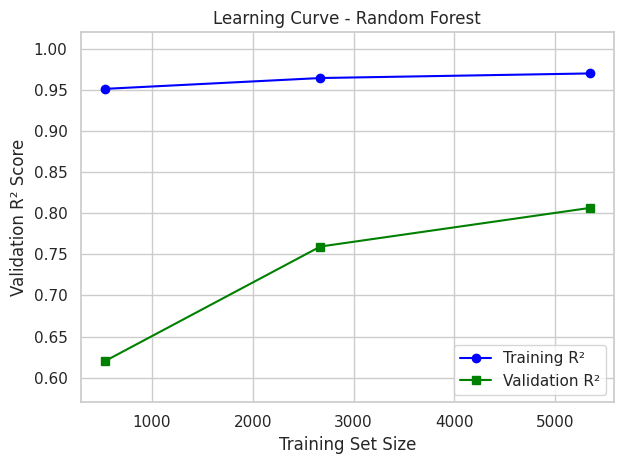

Plotting learning curve for: Gradient Boosting


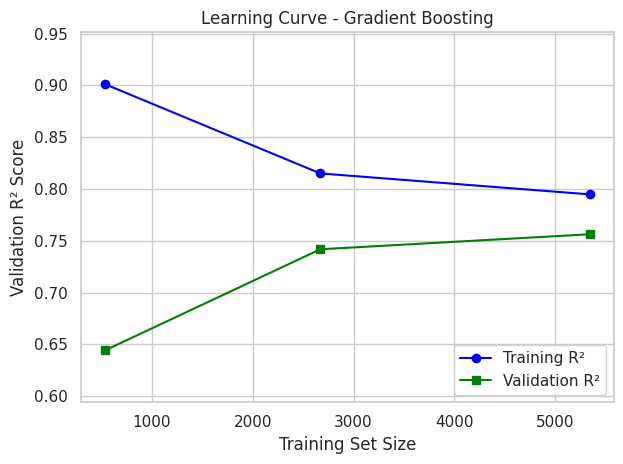

Plotting learning curve for: XGBoost


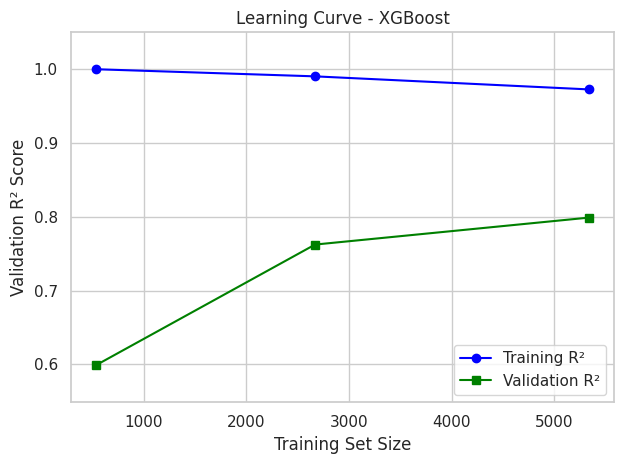

Plotting learning curve for: Hypertuning XG Boost


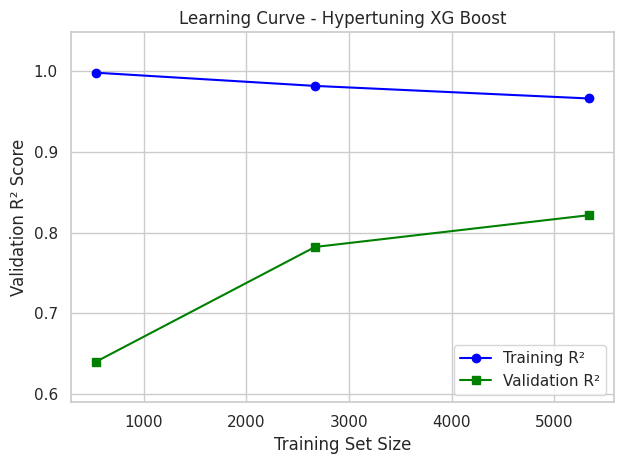

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import pandas as pd

# Preprocessing function
def preprocess_data(X):
    X = X.copy()
    X['Booking_Date'] = pd.to_datetime(X['Booking_Date'])
    X['Booking_Date'] = X['Booking_Date'].apply(lambda date: date.toordinal())
    return X

# Learning curve plotting function
def plot_learning_curve(model, X, y, model_name="Model", cv_folds=2):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=[0.1, 0.5, 1.0],  # Fewer points
        cv=KFold(n_splits=cv_folds, shuffle=True, random_state=100),
        scoring='r2',
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', label="Training R²", color='blue')
    plt.plot(train_sizes, val_mean, 's-', label="Validation R²", color='green')

    plt.title(f'Learning Curve - {model_name}')
    plt.xlabel("Training Set Size")
    plt.ylabel("Validation R² Score")
    plt.ylim(min(train_mean.min(), val_mean.min()) - 0.05,
             max(train_mean.max(), val_mean.max()) + 0.05)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Preprocess the dataset
X = preprocess_data(data.drop("Price", axis=1))
y = data["Price"]

# Choose only fast models (or reduce others)
models = {
     "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "Hypertuning XG Boost": xgb_model.best_estimator_
}

# Plot learning curves
for name, model in models.items():
    print(f"Plotting learning curve for: {name}")
    plot_learning_curve(model, X, y, model_name=name)


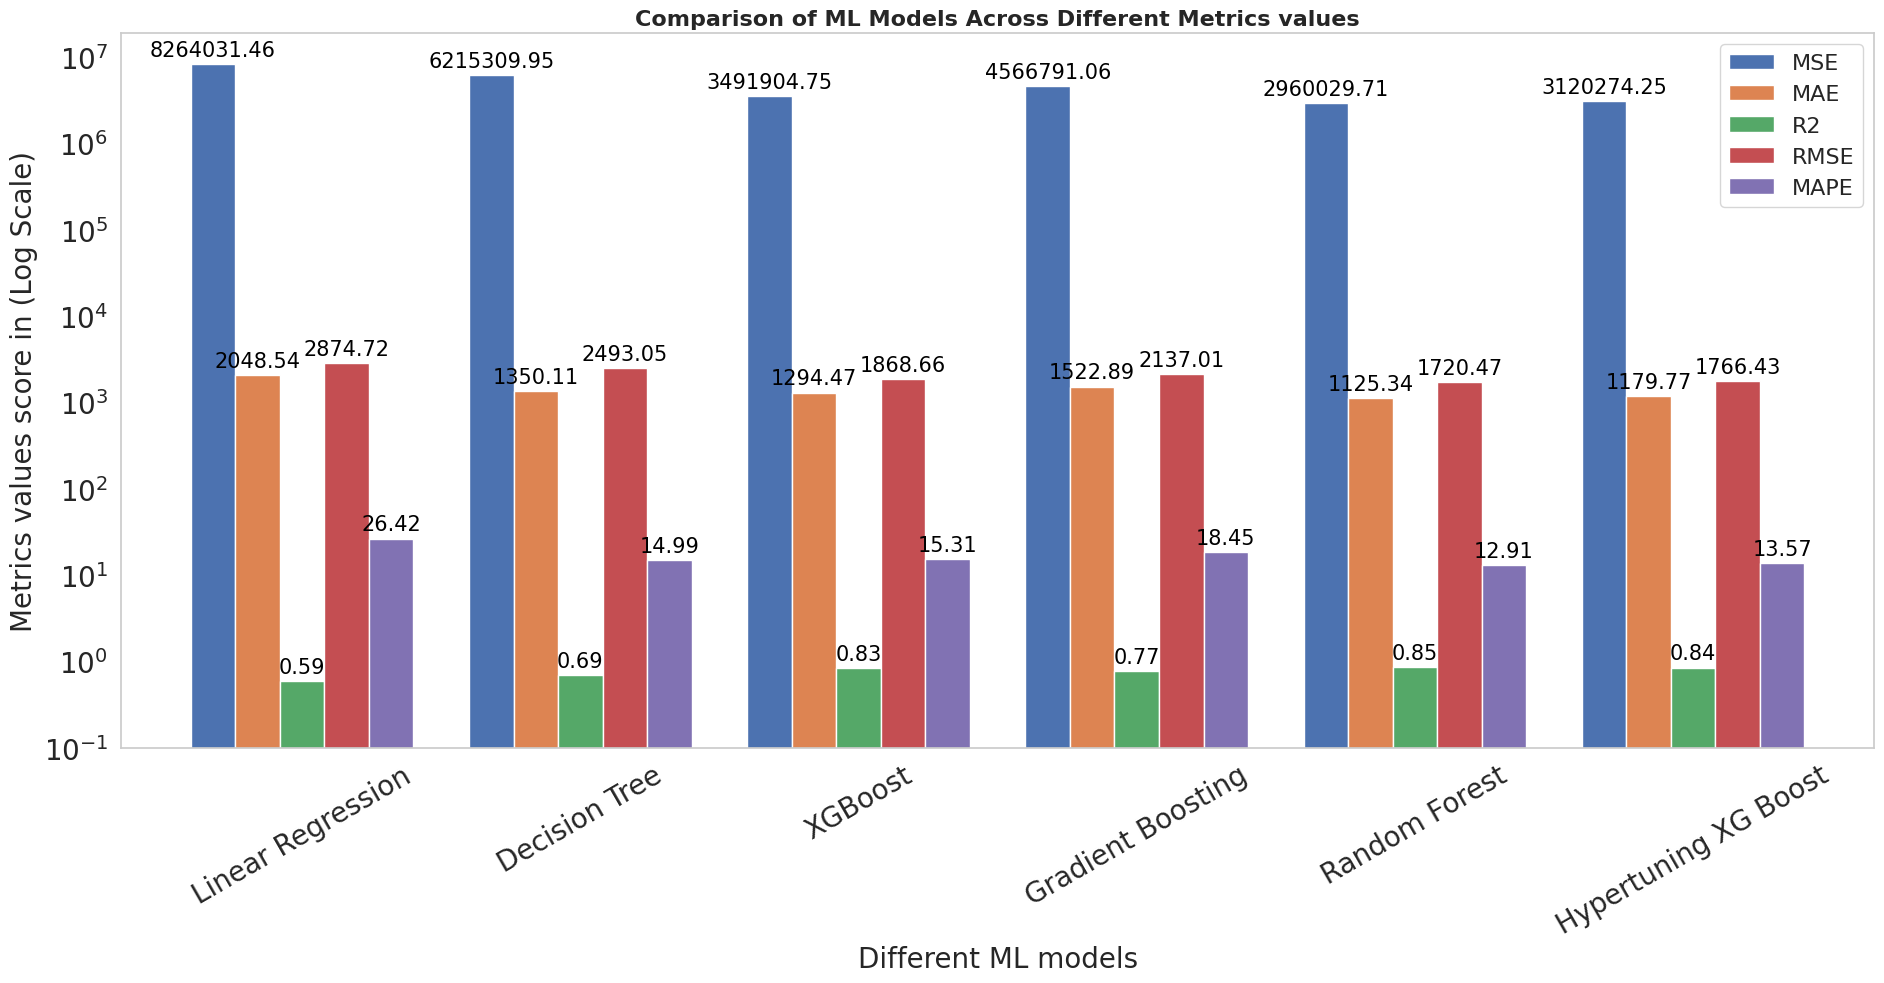

In [258]:
# Assuming you want to plot from the `metrics` dictionary you created
df_plot = pd.DataFrame(metrics, index=model_names)

# Set up the figure and plot the grouped bar chart
fig, ax1 = plt.subplots(figsize=(19, 10))

# Plot grouped bar chart with metrics as grouped bars for each model on the primary axis (ax1)
bar_container = df_plot.plot(kind='bar', ax=ax1, width=0.8)

# Title and labels
ax1.set_title("Comparison of ML Models Across Different Metrics values", fontsize=16, fontweight='bold')
ax1.set_xlabel("Different ML models", fontsize=20)
ax1.set_ylabel("Metrics values score in (Log Scale)", fontsize=20)

# X-axis labels (metrics)
ax1.set_xticklabels(df_plot.index, fontsize=18, rotation=30,ha='center')
# Set font size for both X and Y axis tick labels
ax1.tick_params(axis='x', labelsize=20)  # Set X-axis tick label size
ax1.tick_params(axis='y', labelsize=20)  # Set Y-axis tick label size

# Apply log scale to the primary y-axis
ax1.set_yscale('log')  # Apply log scaling for better visualization of larger values like MSE, MAE, RMSE
ax1.set_ylim(bottom=0.1)  # Avoid log scale issues at 0
# Remove grid lines
ax1.grid(False)

# Add value labels to each bar
for bars in bar_container.containers:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.2f}',  # Value text
                     xy=(bar.get_x() + bar.get_width() / 2, height),  # Position
                     xytext=(0, 3),  # Offset for positioning the label
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=15, color='black')

# Adjust layout to prevent label clipping
plt.legend(loc='upper right', fontsize=16)
plt.tight_layout()
# Show the plot
plt.show()